In [1]:
# %run ../Utils/FGindex_function.ipynb
# %run ../Utils/portfolio_metrics.ipynb
# %run ../Utils/Backtesting_function.ipynb

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from operator import itemgetter
from datetime import date, datetime
import time

In [3]:

minio_uri = "http://211.55.12.167:8801"
bucket_name = "stock-dataset"
fname = "index_best_parameter.csv"

url = f"{minio_uri}/{bucket_name}/{fname}"
index_final_result = pd.read_csv(url)


1001


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



1022
1024
1025
1026
1027
1028
1034
1035
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1167
1182
1224
1227
1232
1244
2001
2002
2003
2004
2012
2015
2024
2026
2027
2029
2031
2037
2041
2042
2043
2056
2058
2062
2063
2065
2066
2067
2068
2070
2072
2074
2075
2077
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2181
2182
2183
2184
2203
2212
2213
2214
2215
2216
2217
2218


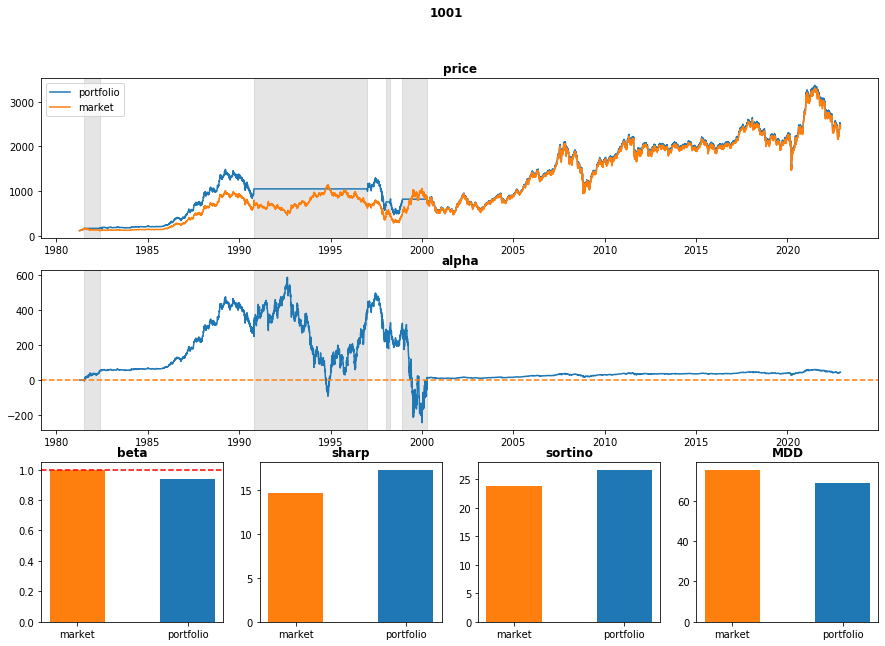

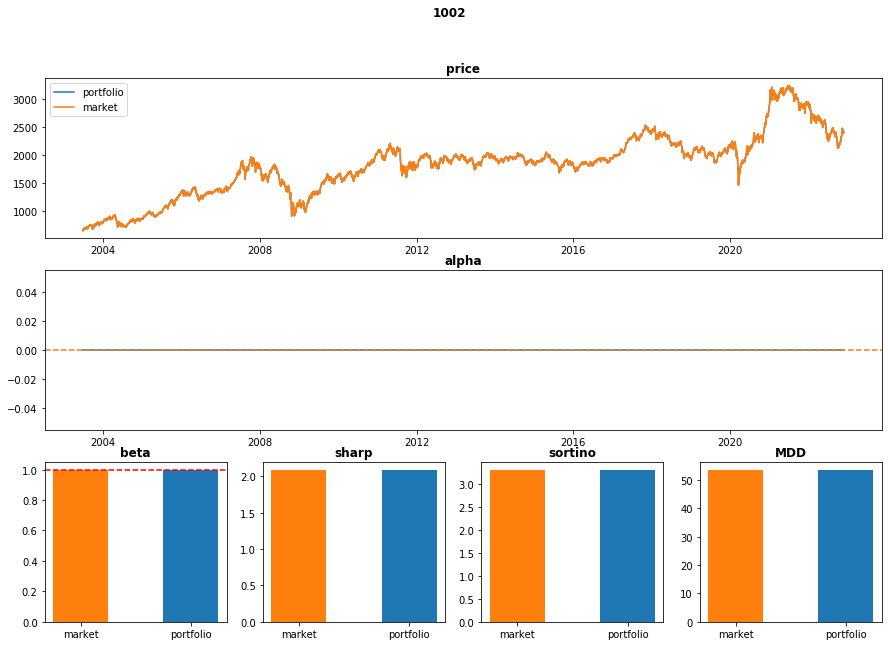

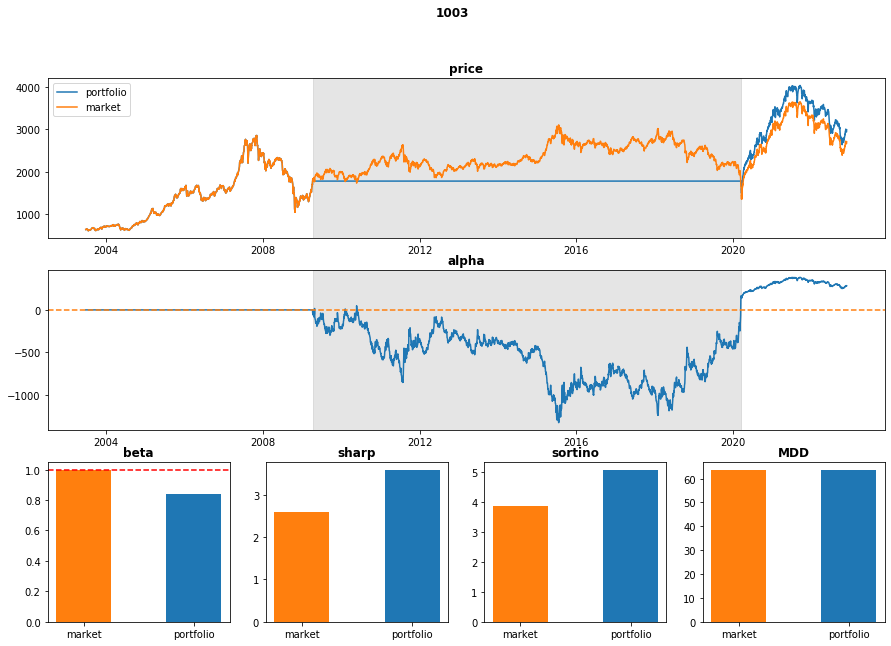

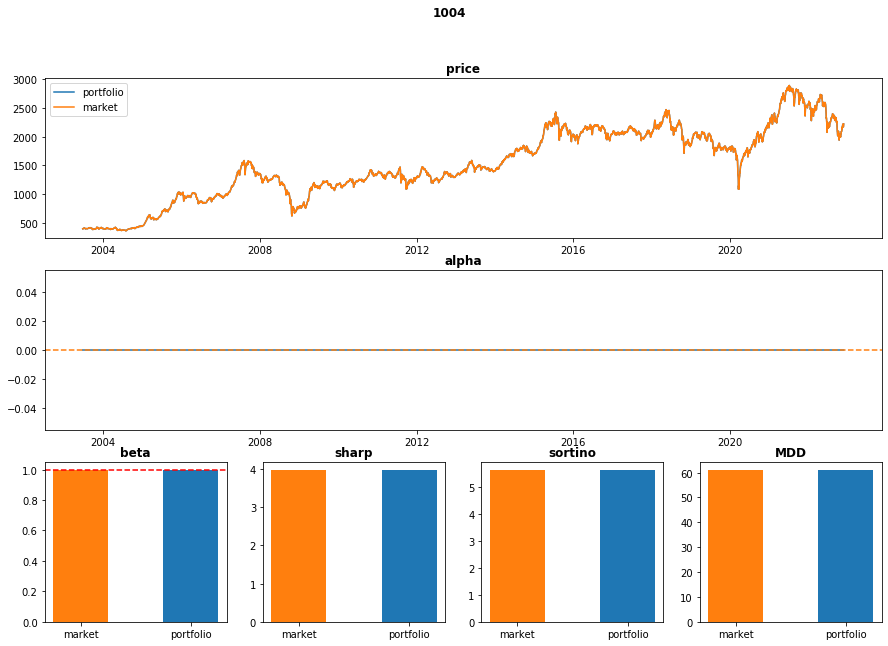

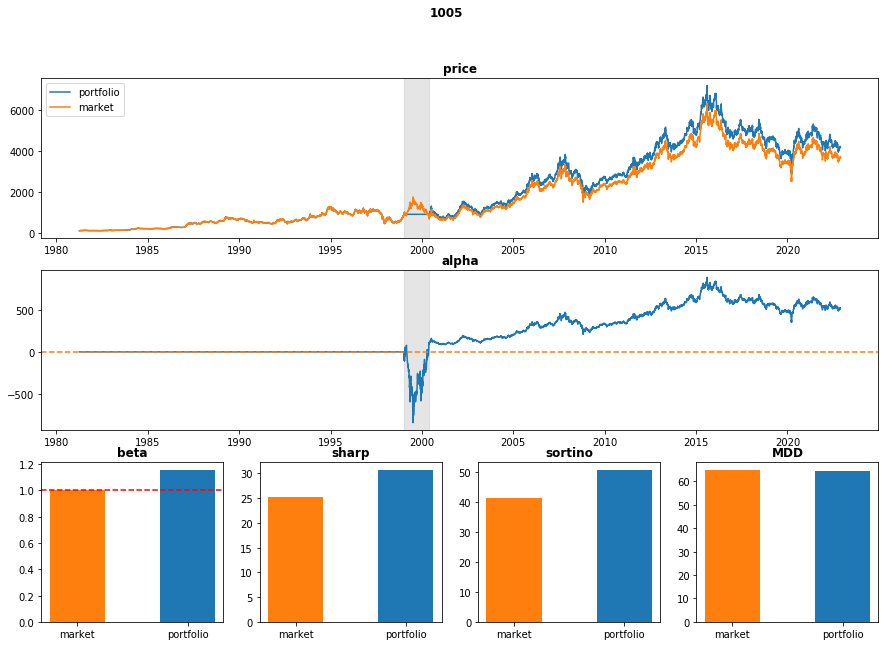

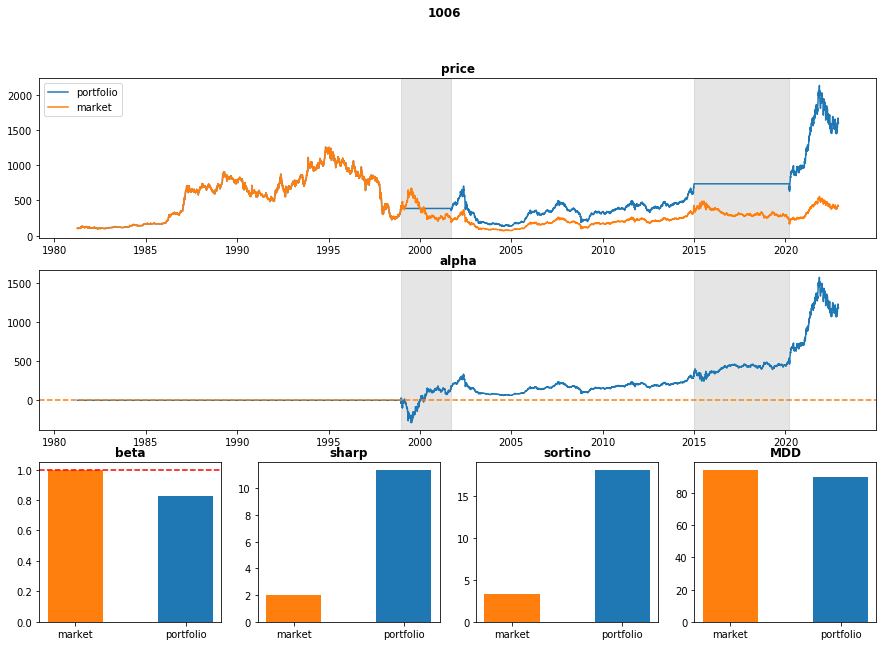

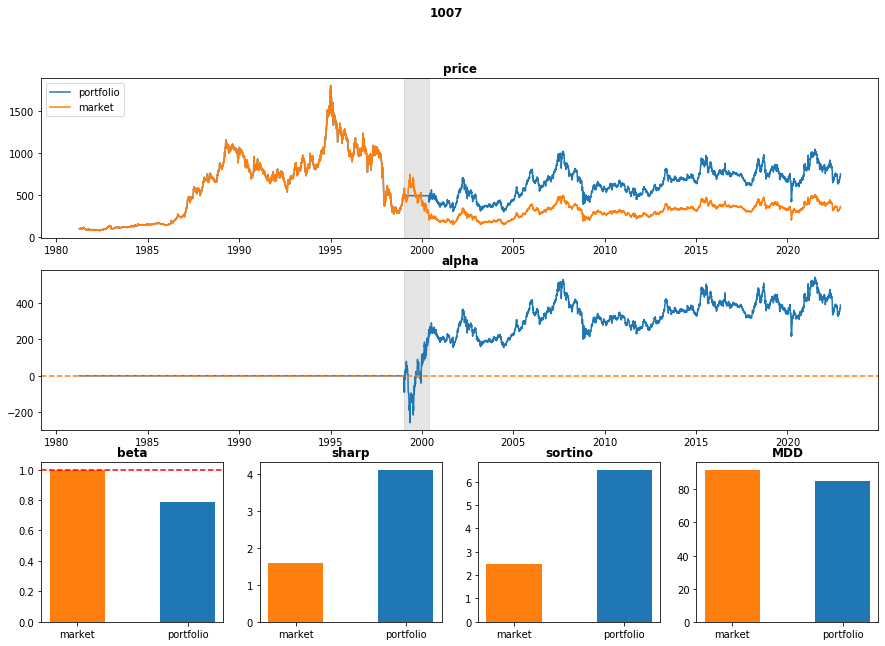

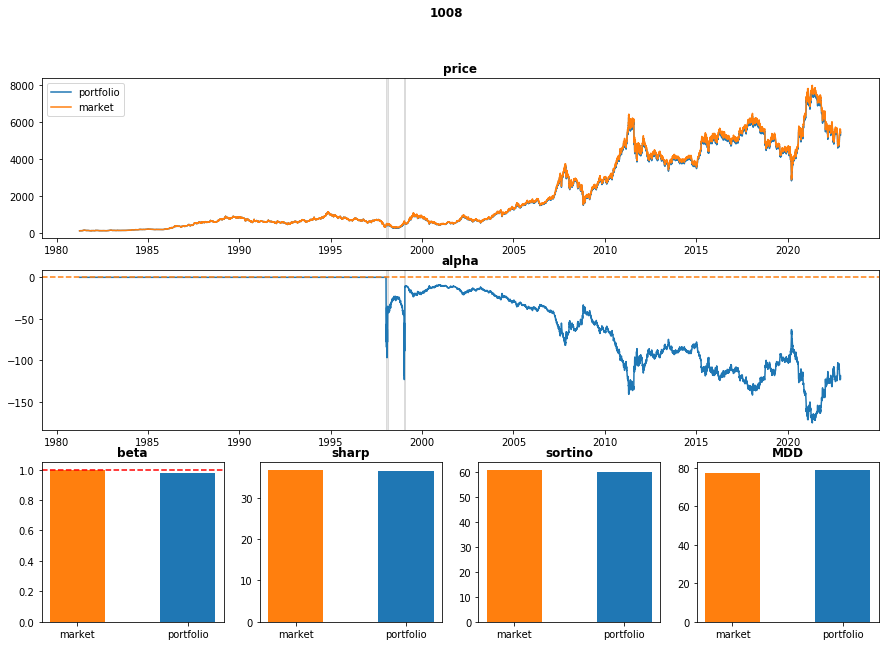

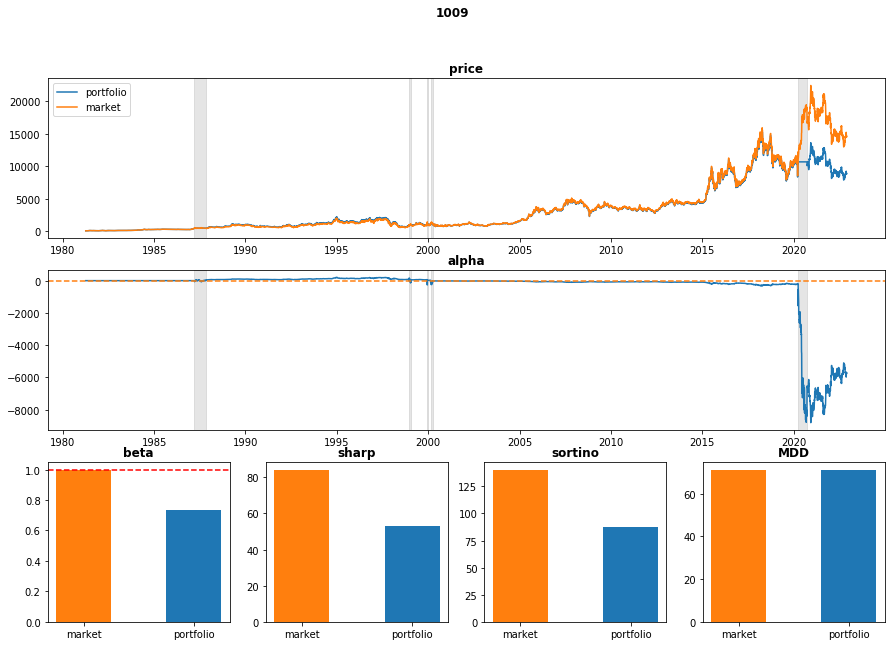

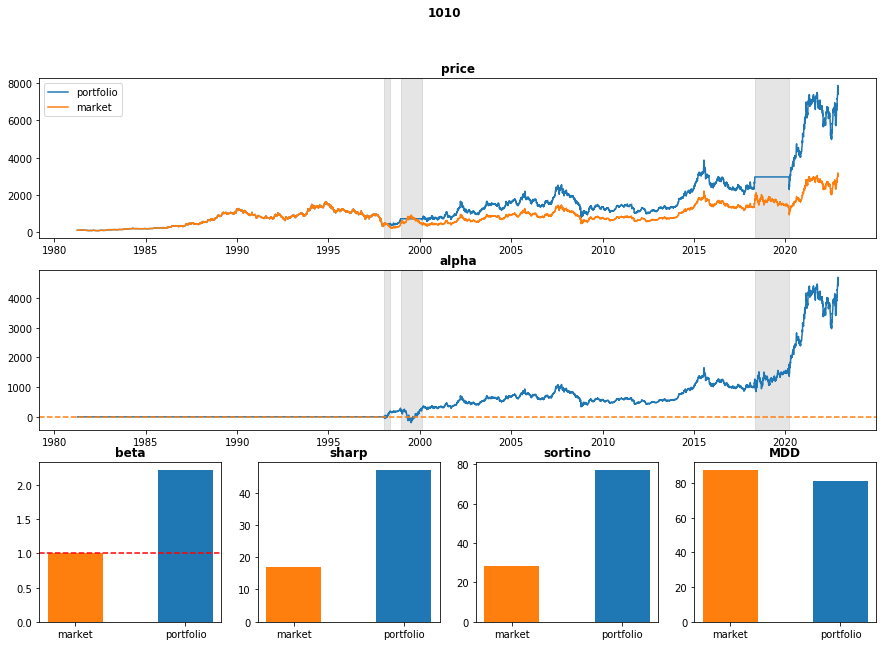

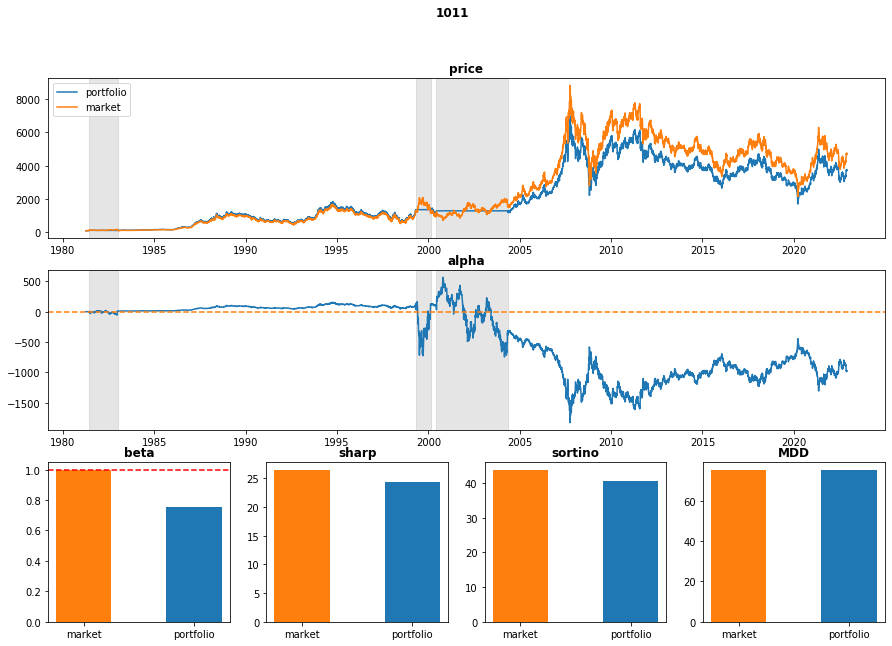

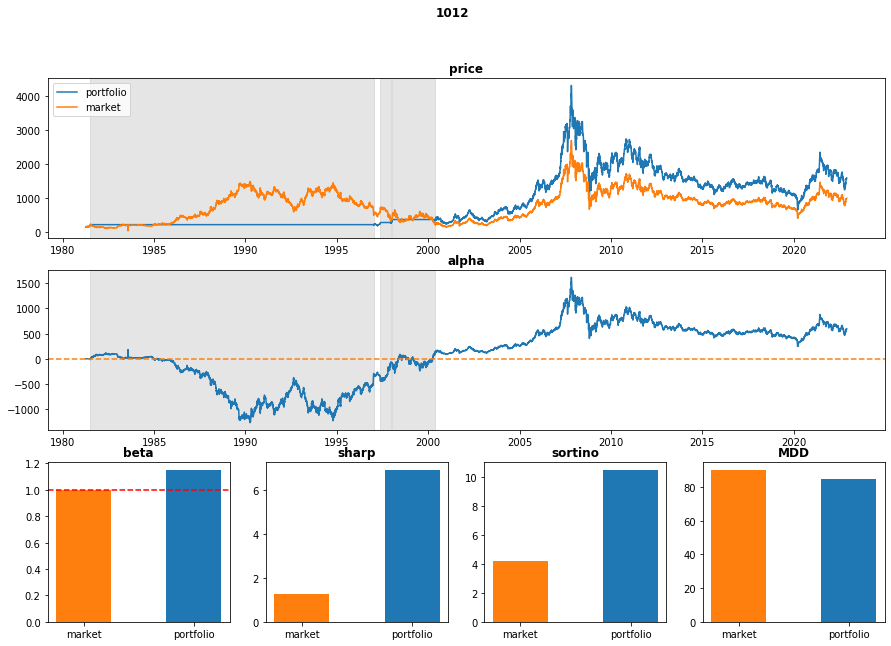

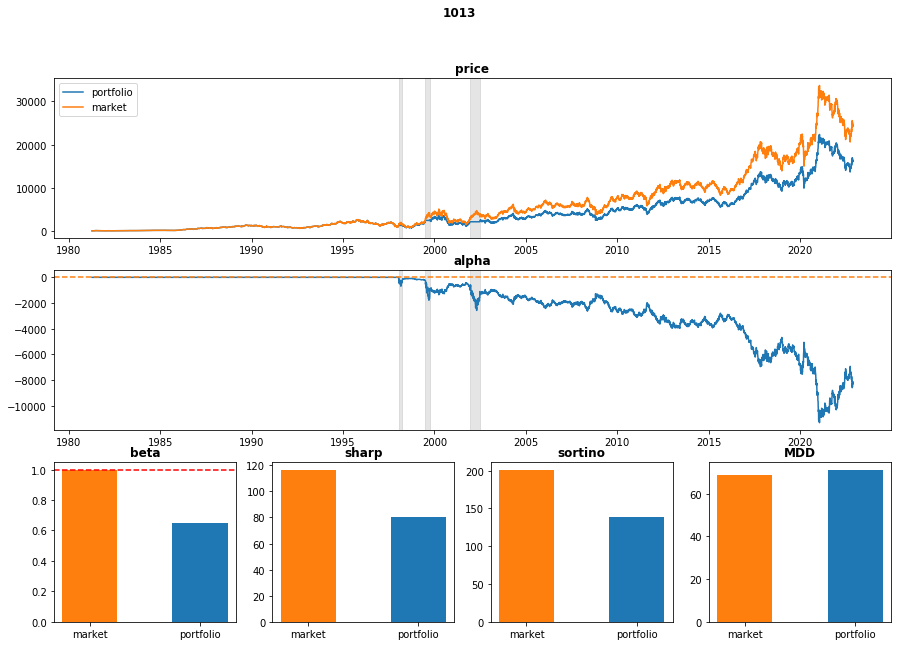

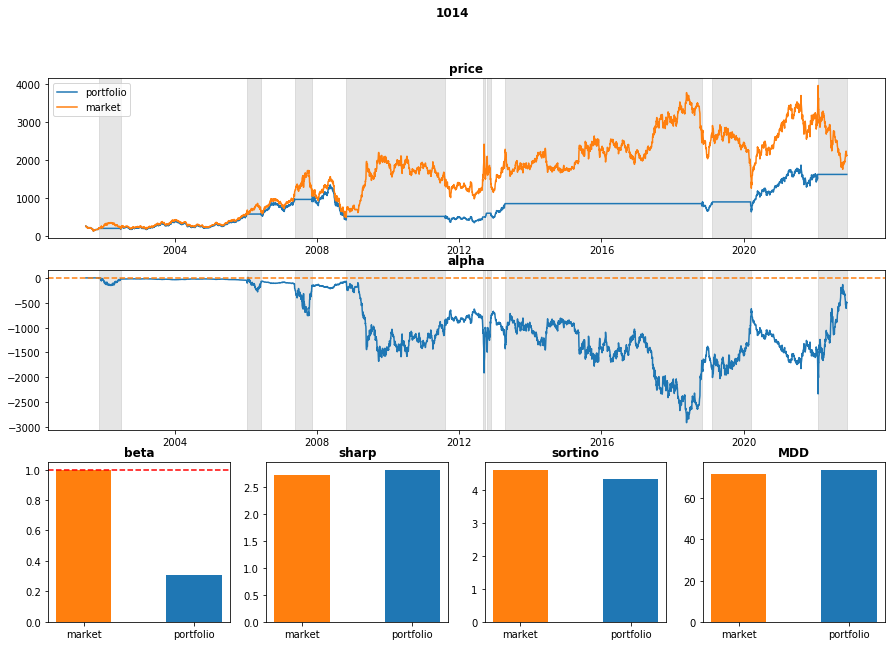

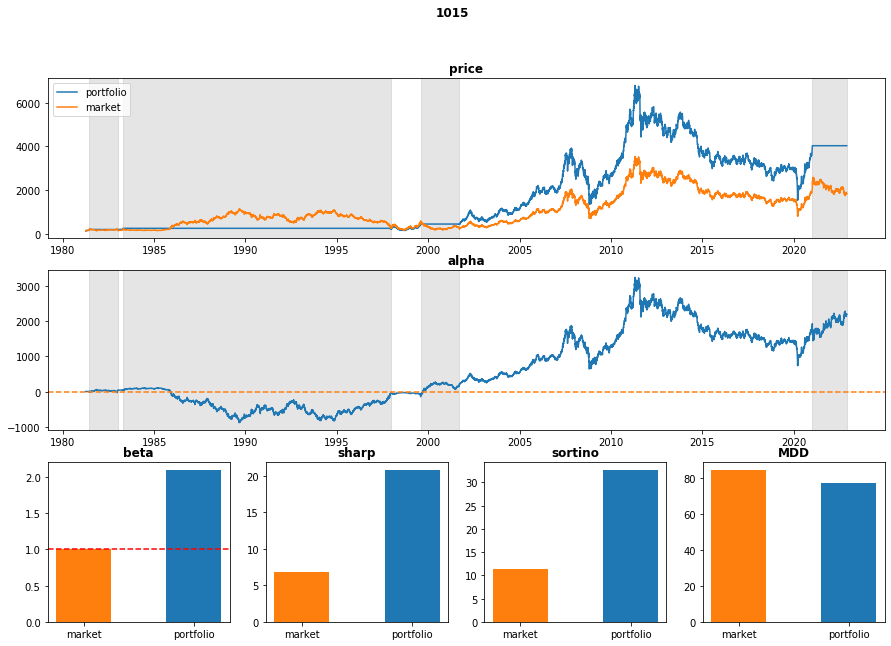

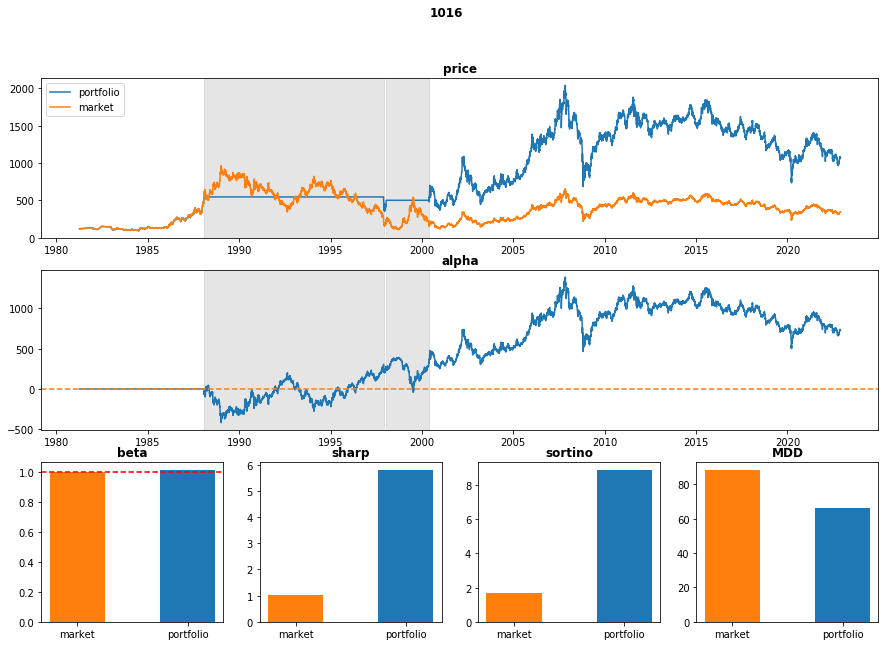

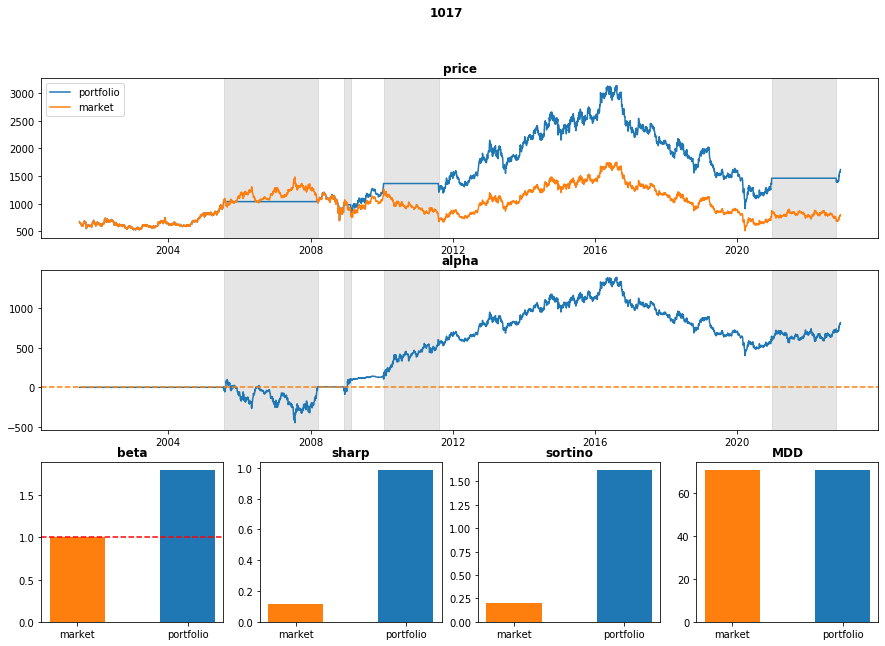

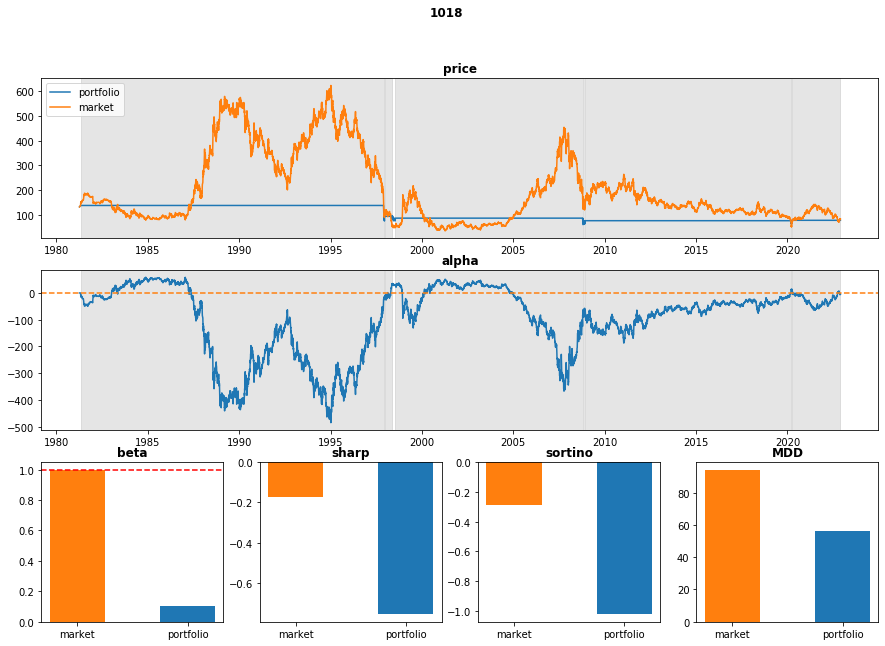

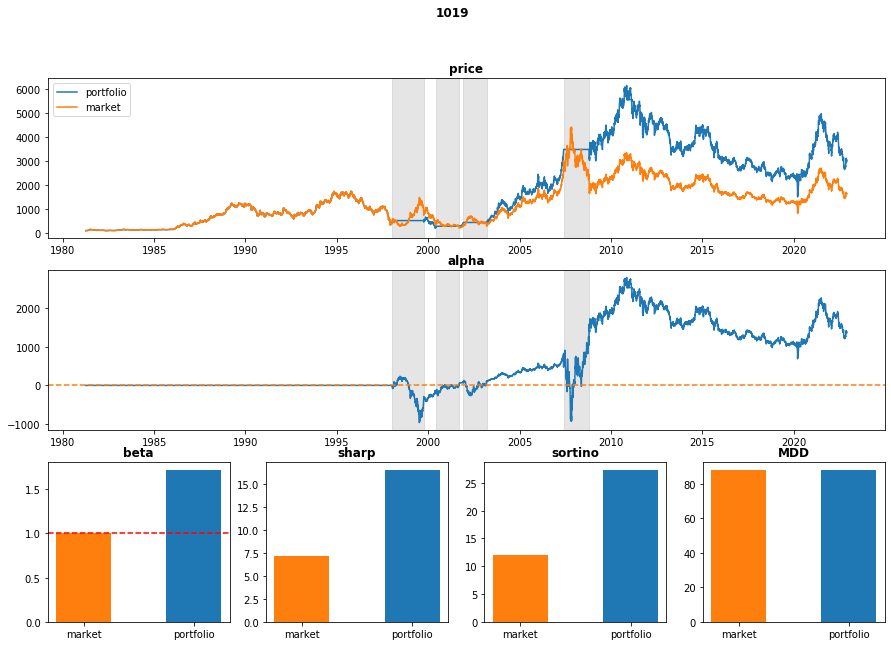

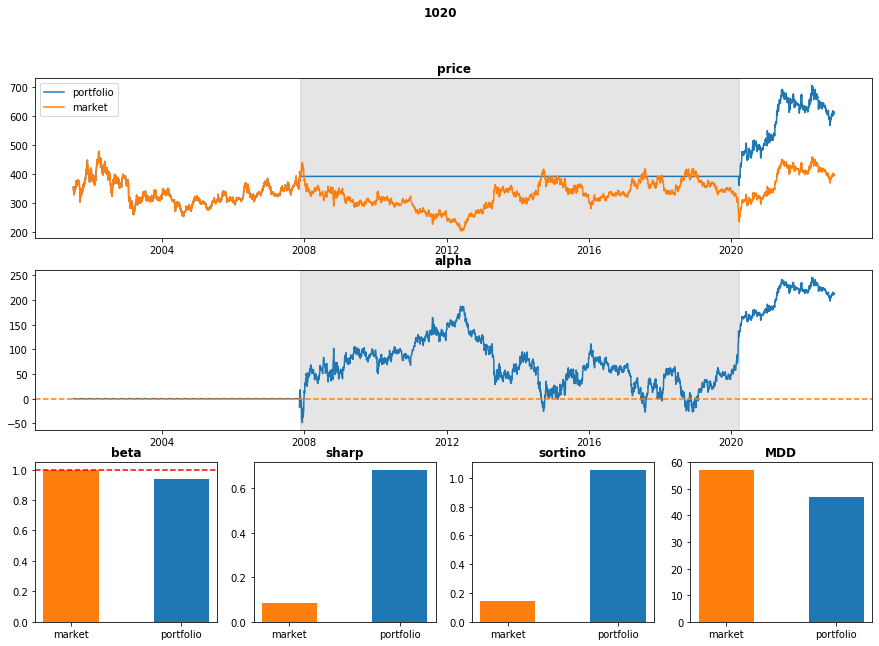

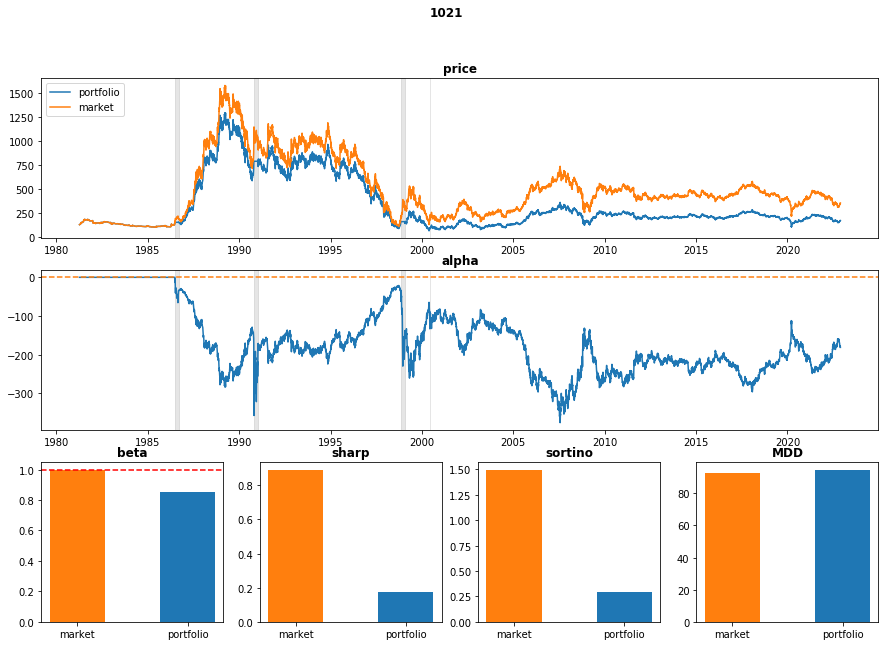

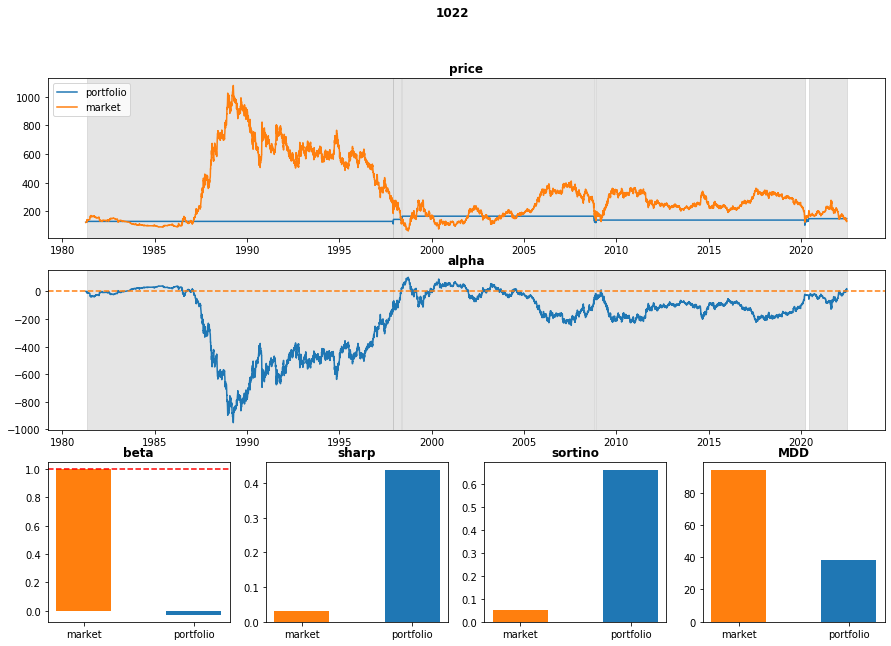

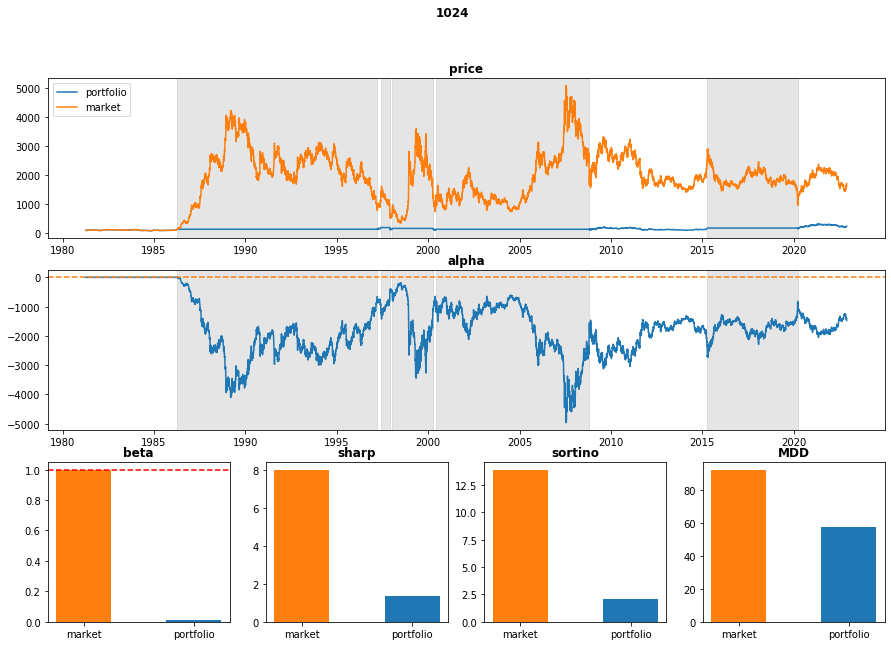

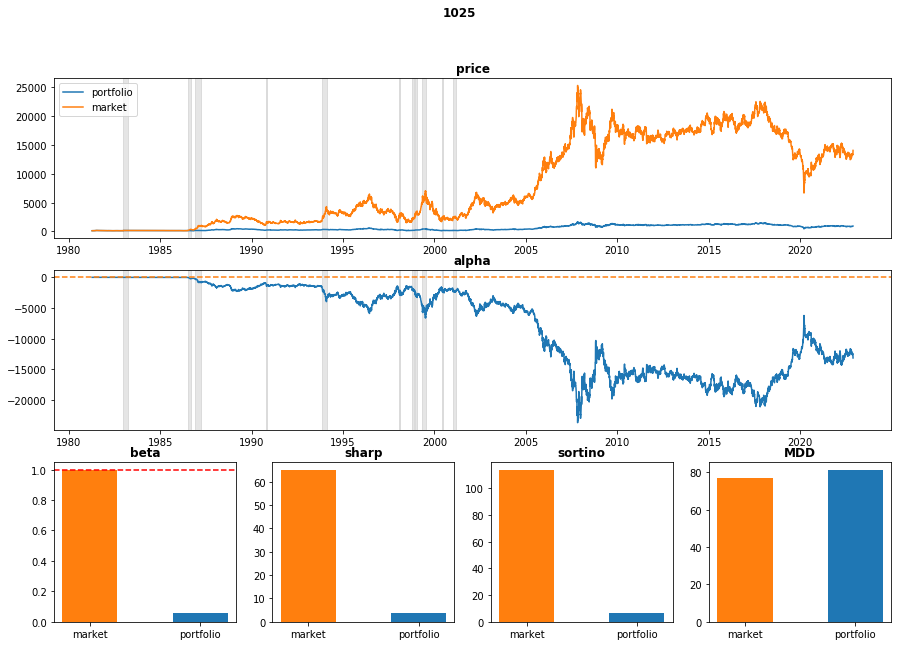

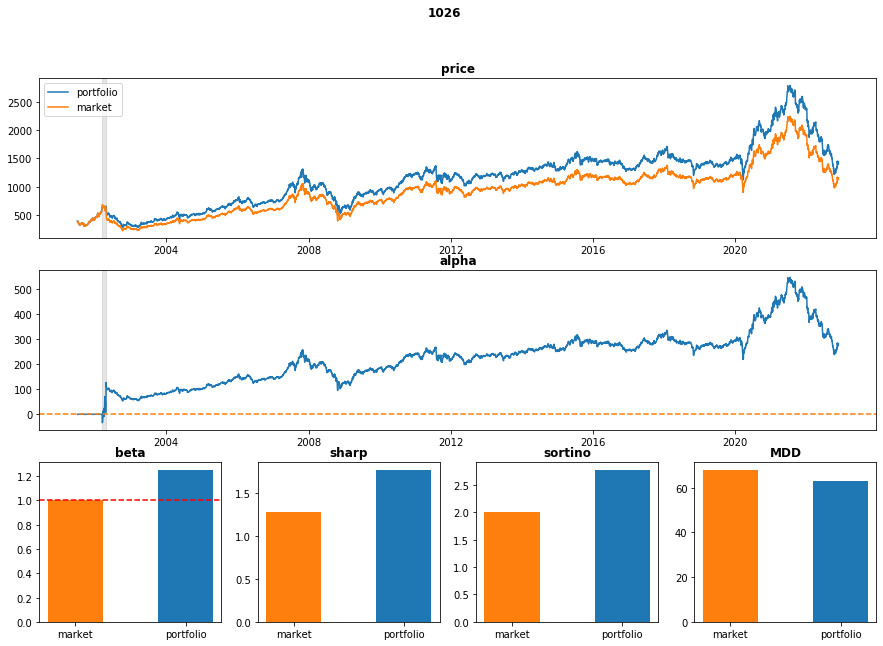

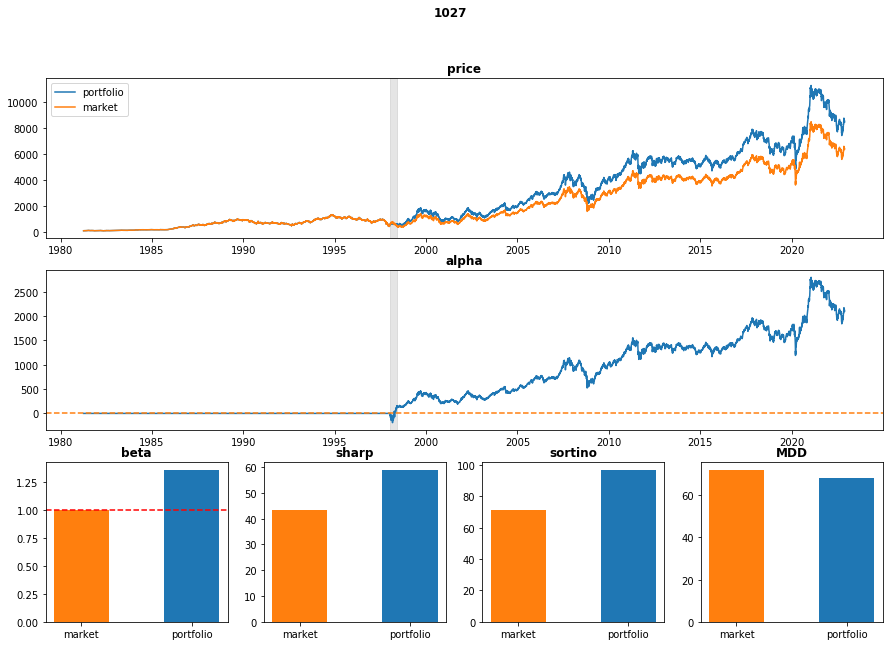

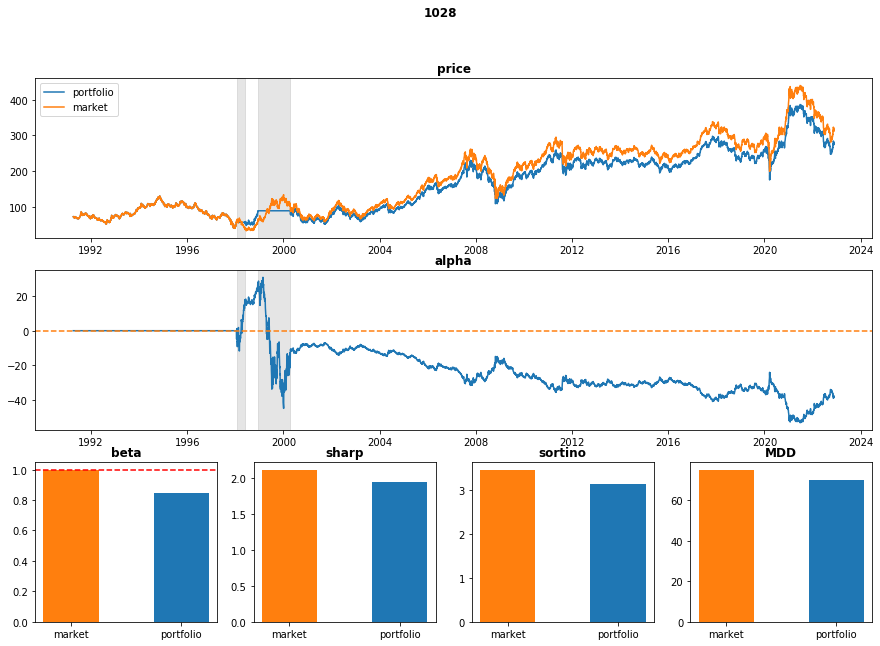

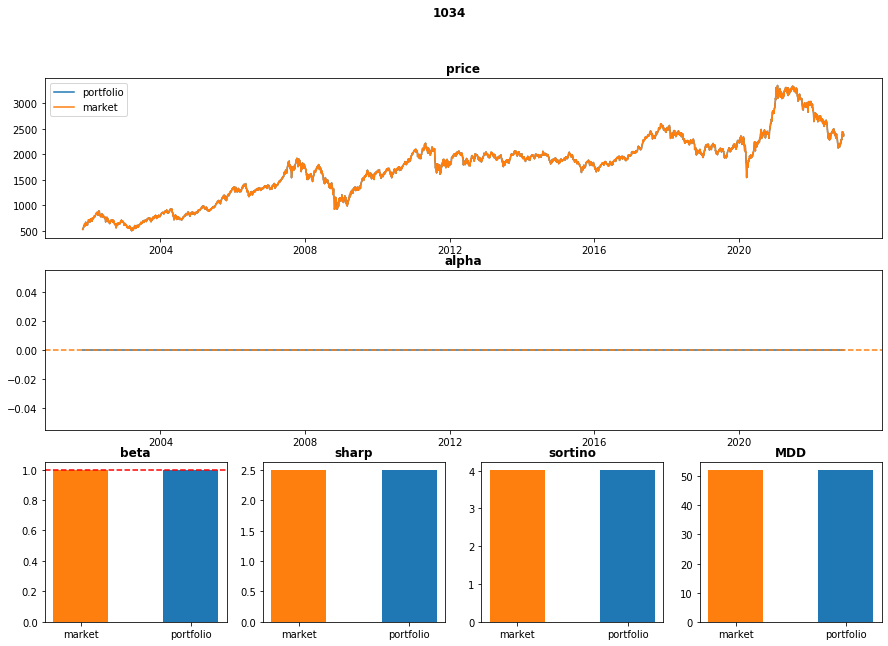

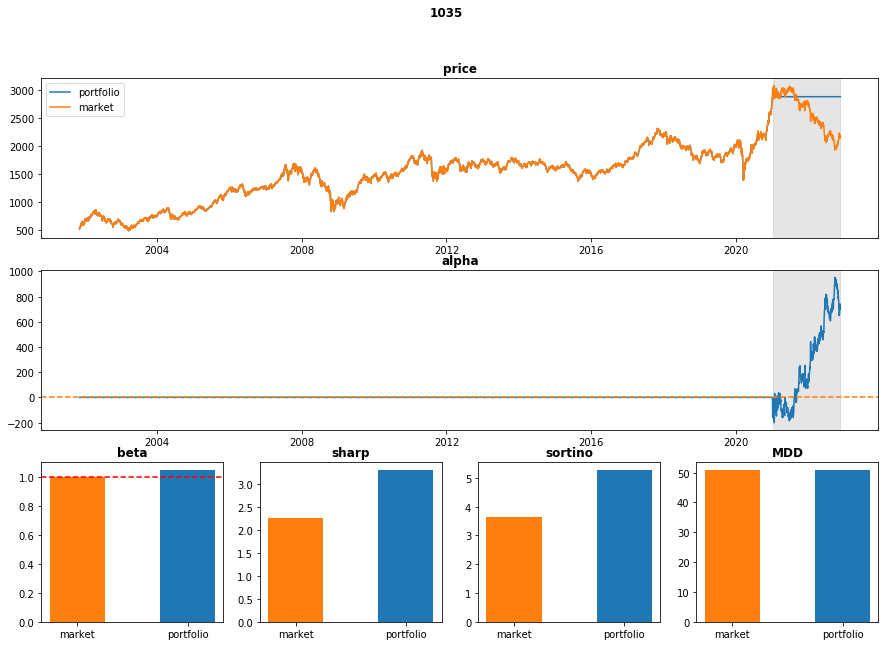

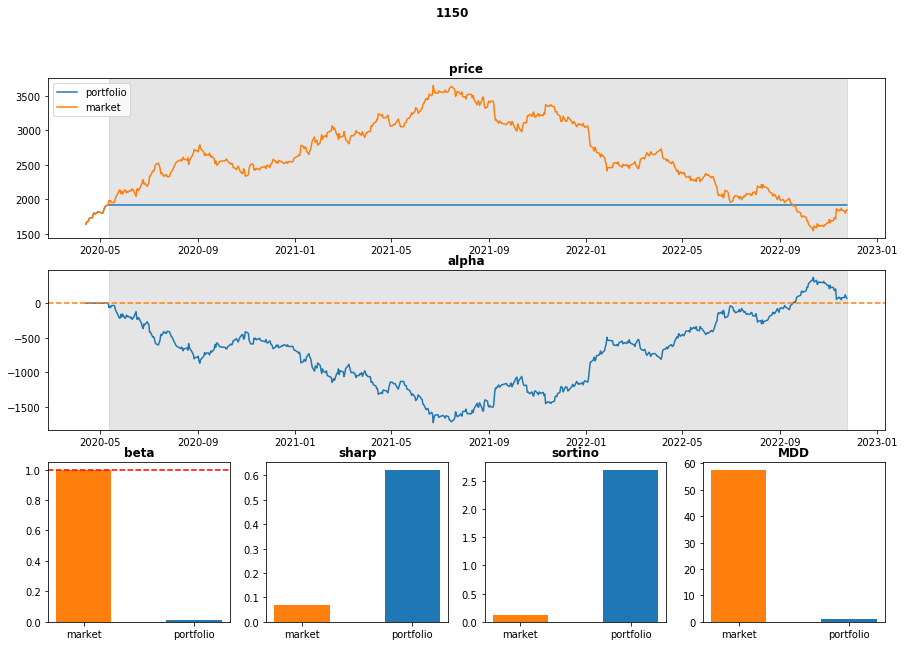

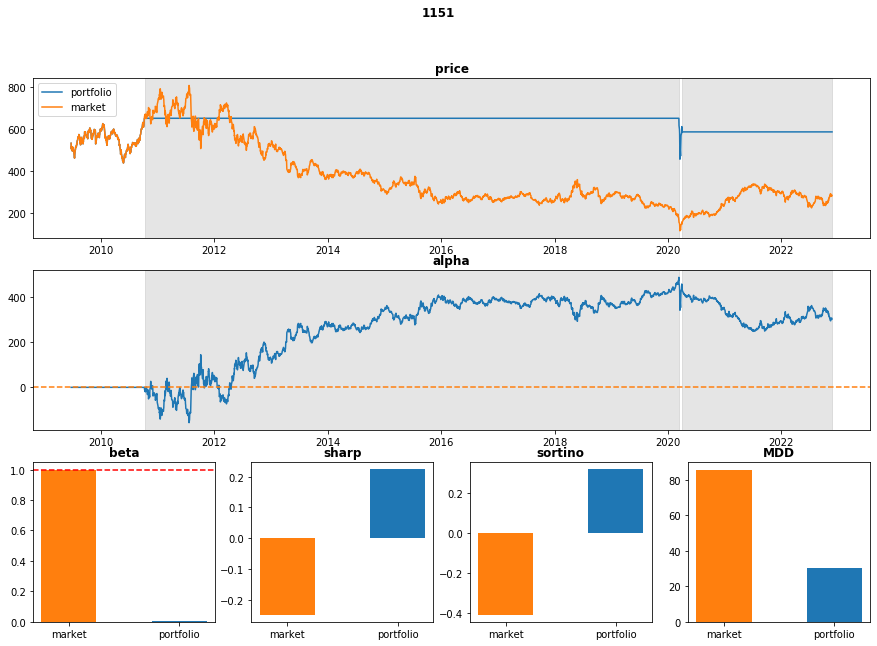

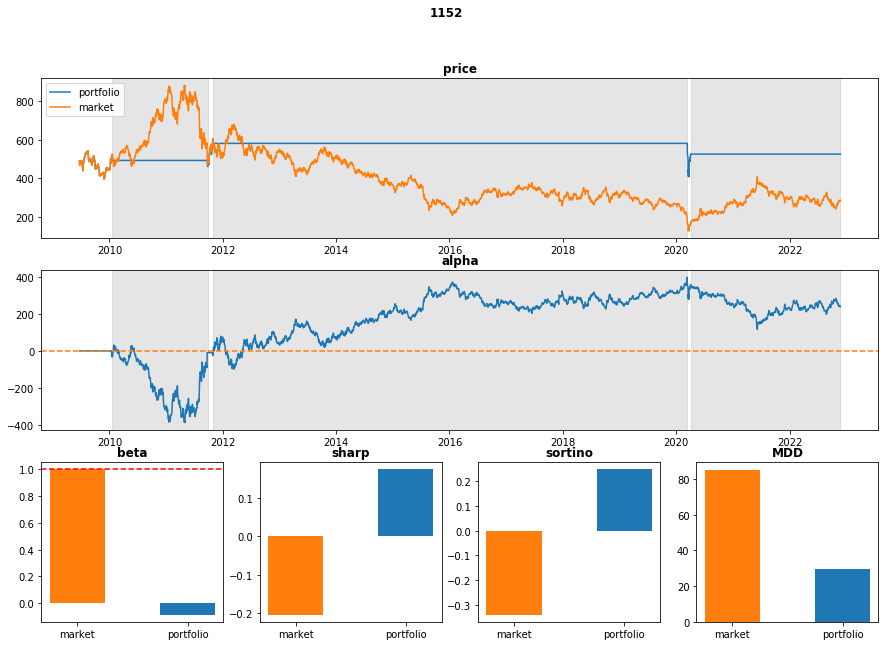

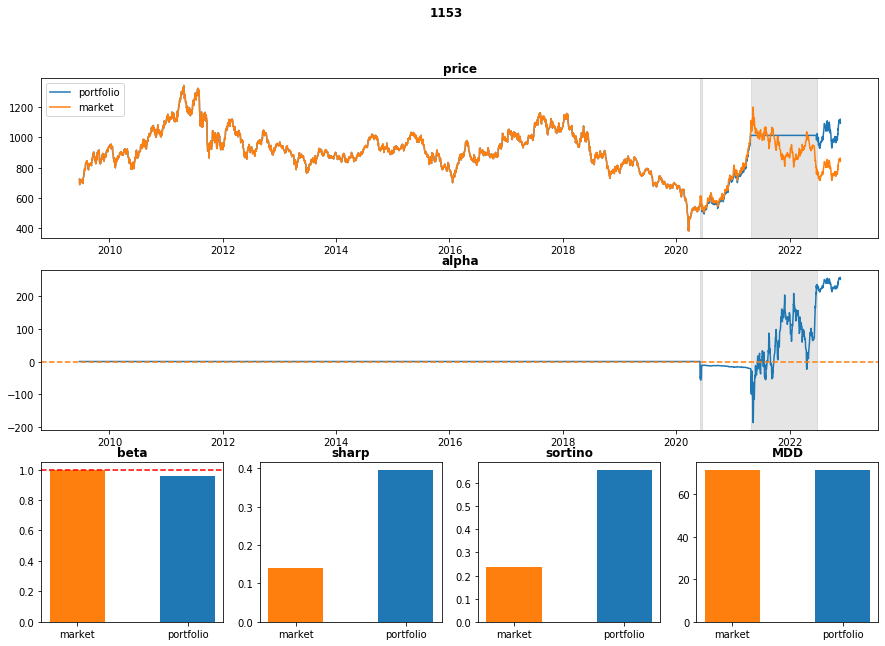

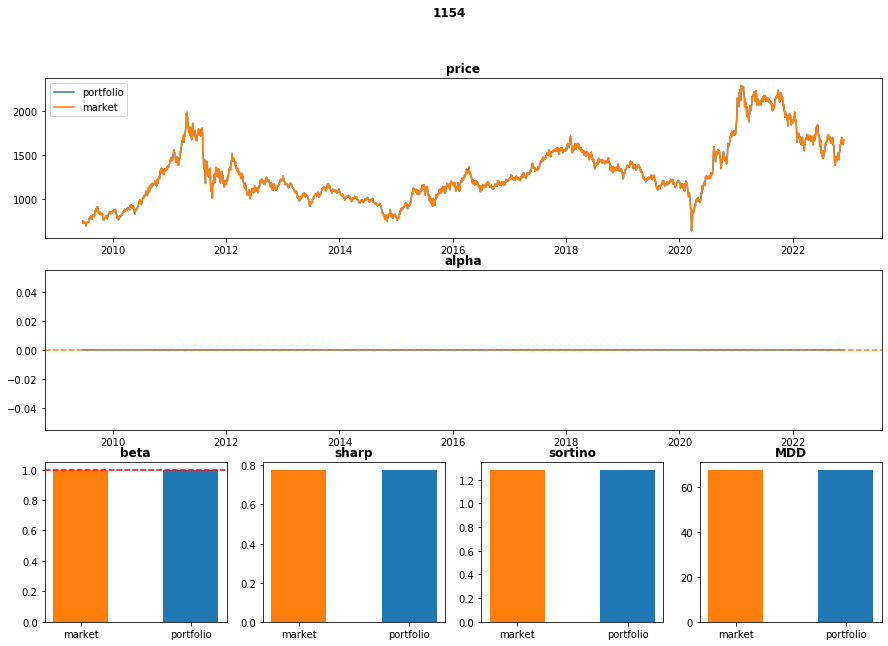

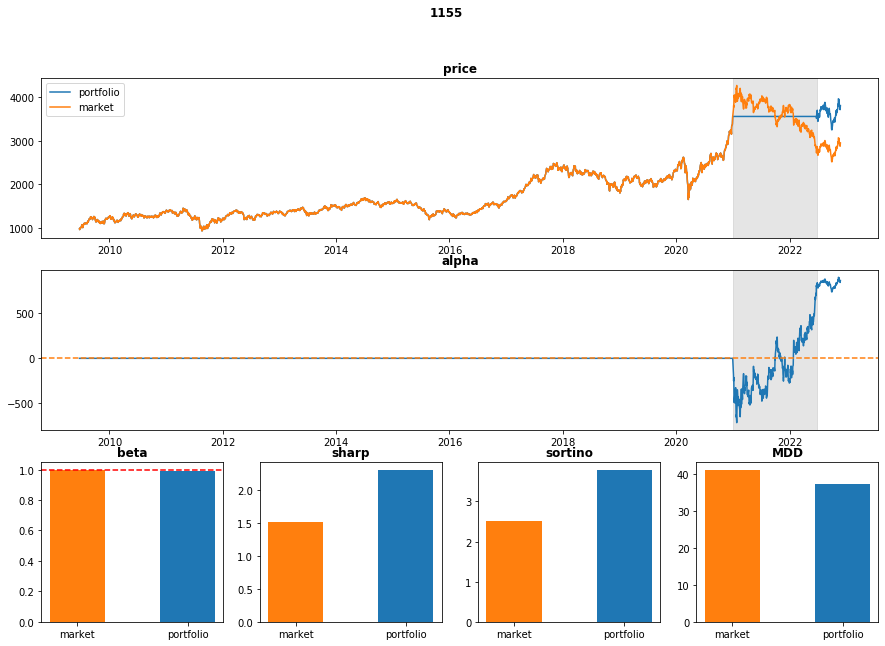

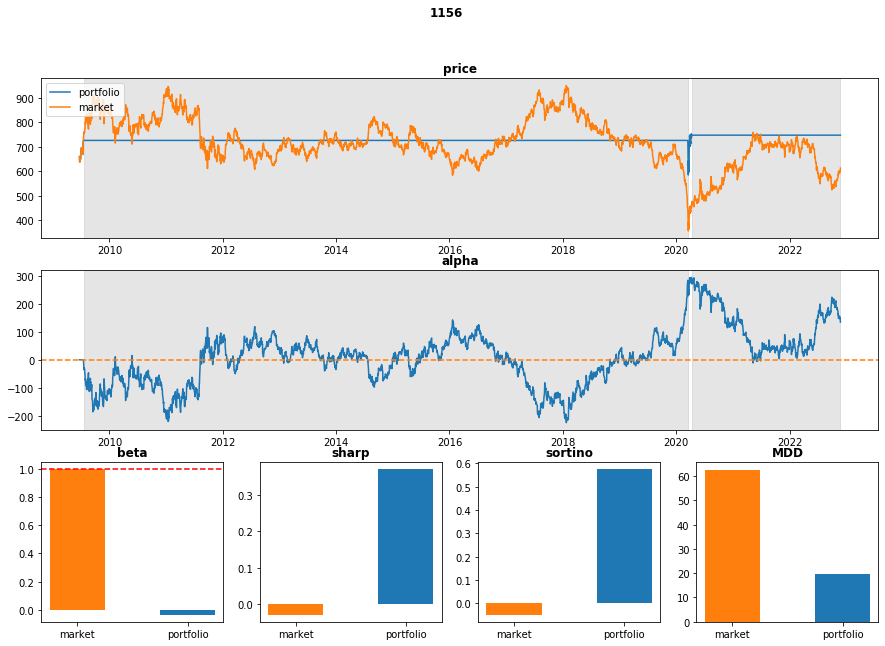

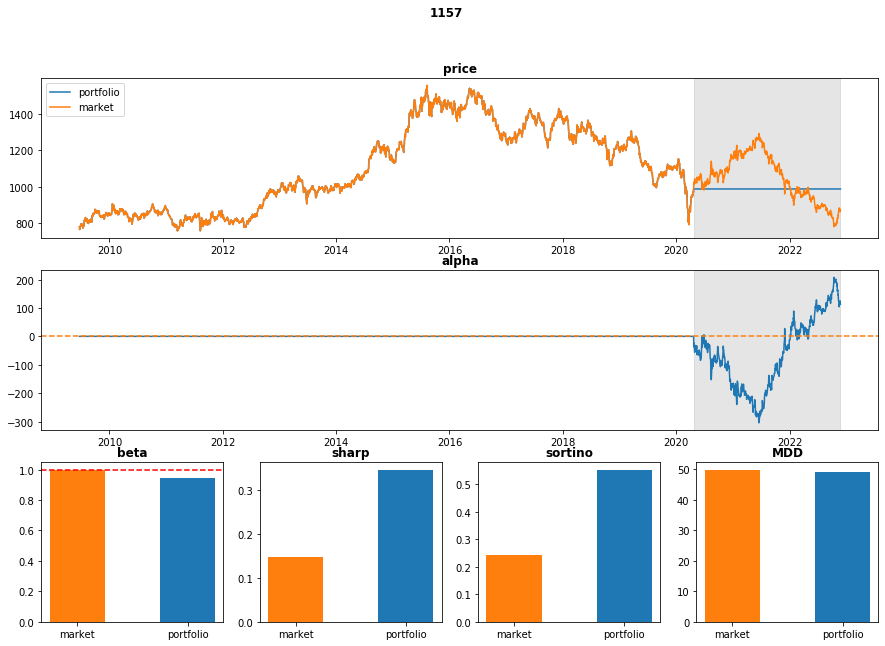

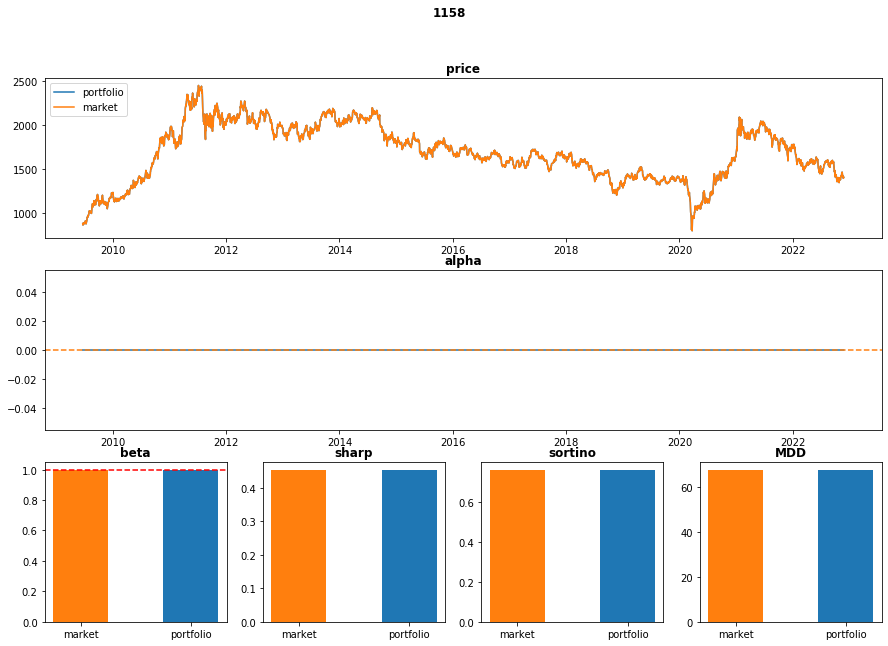

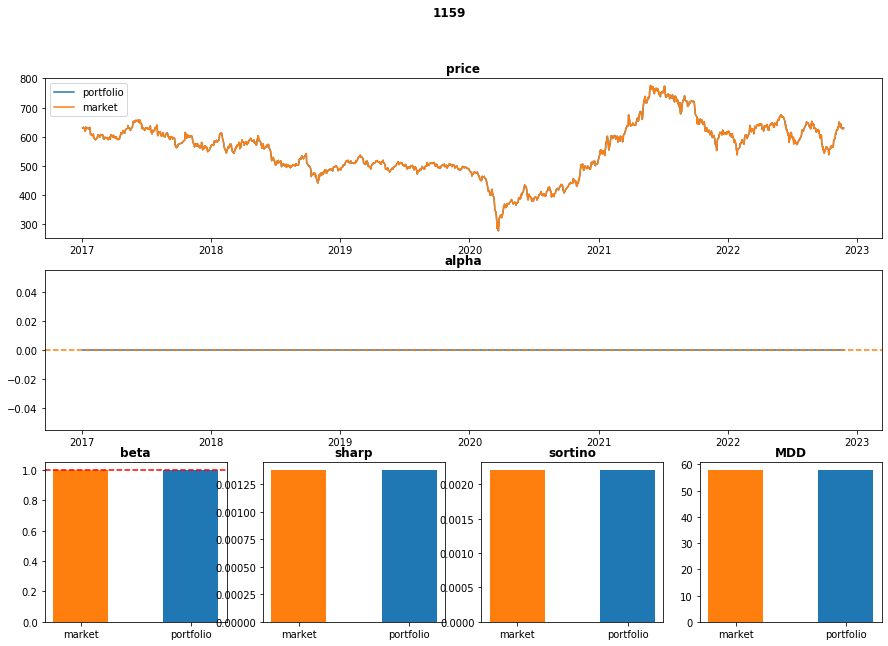

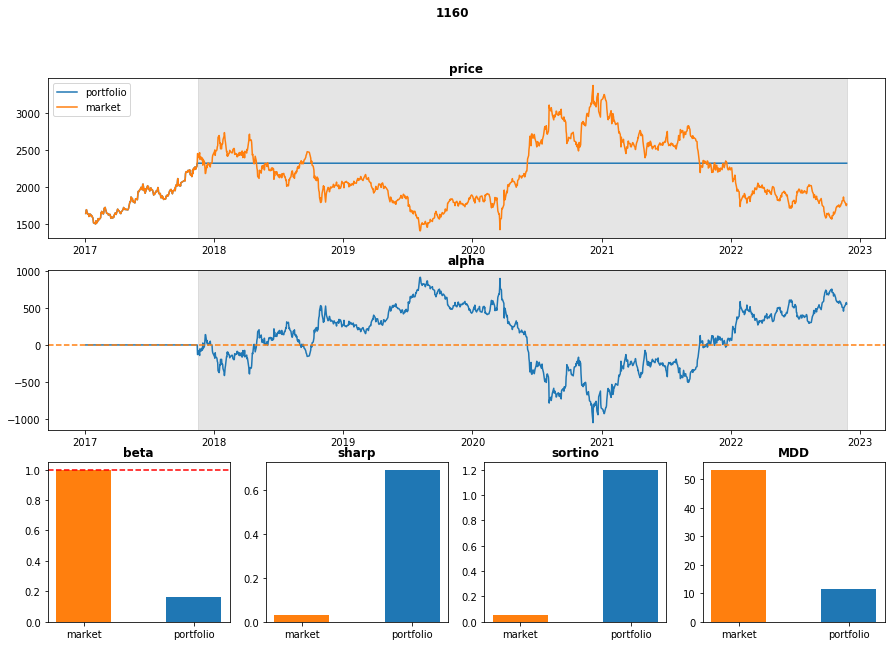

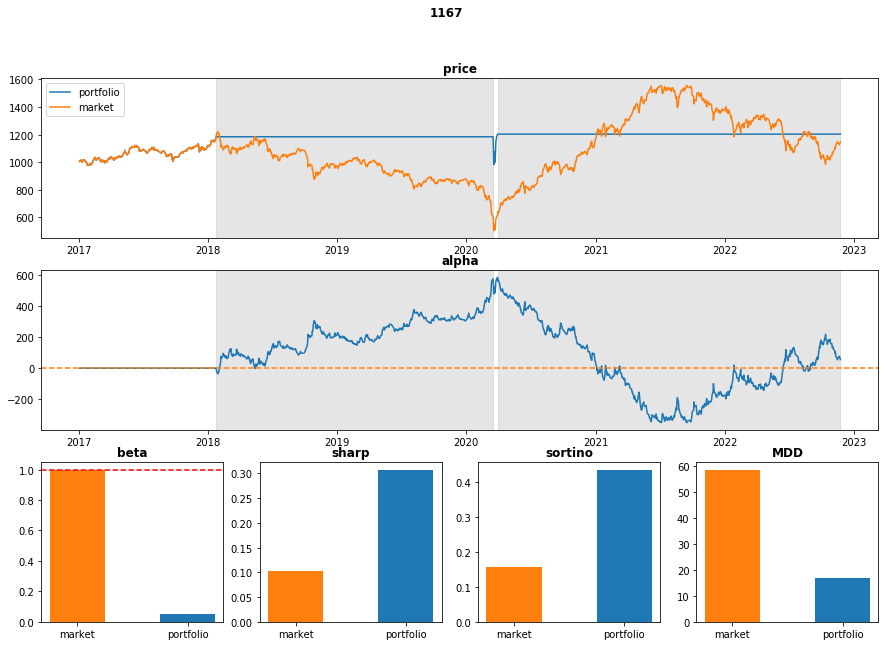

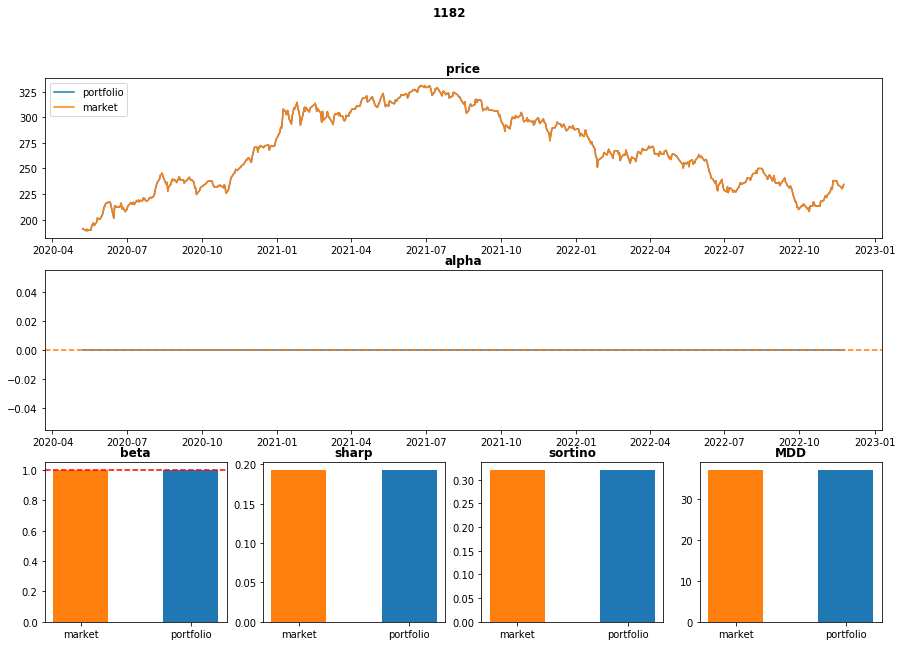

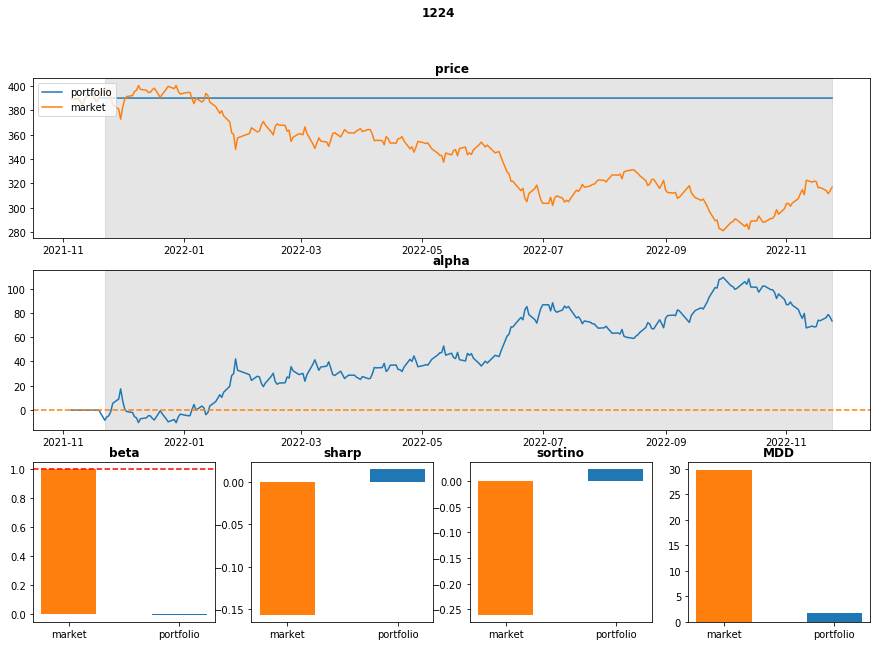

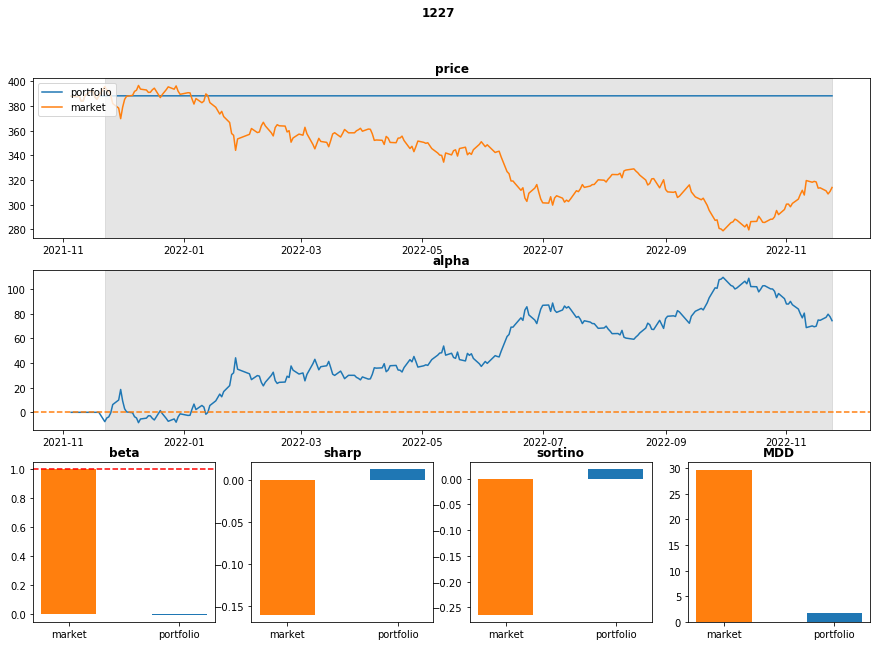

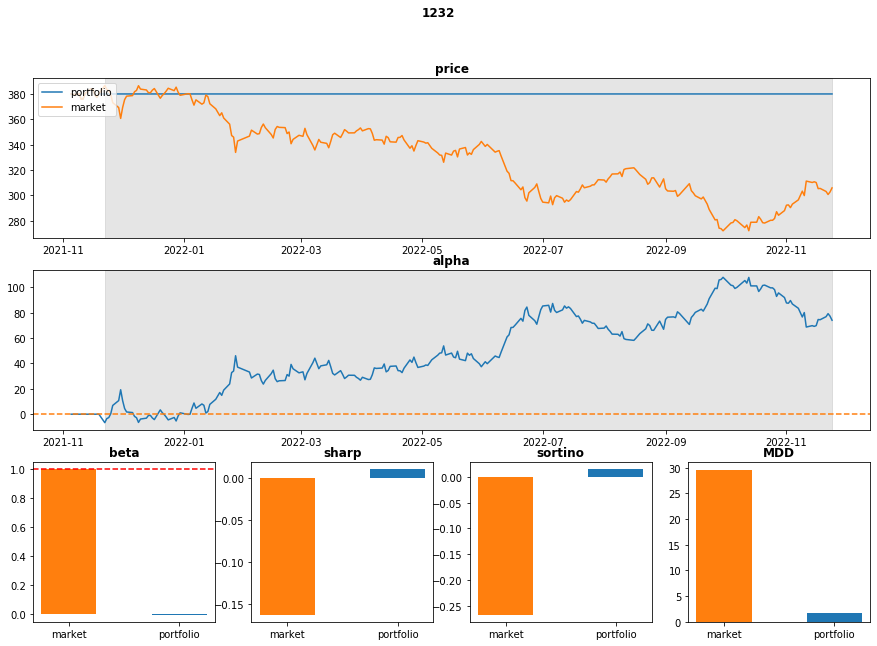

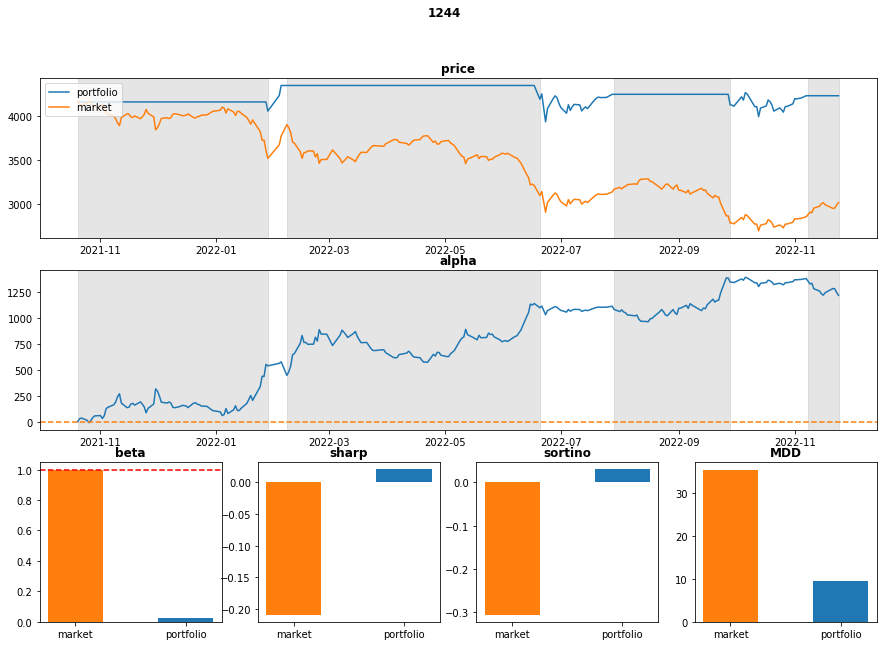

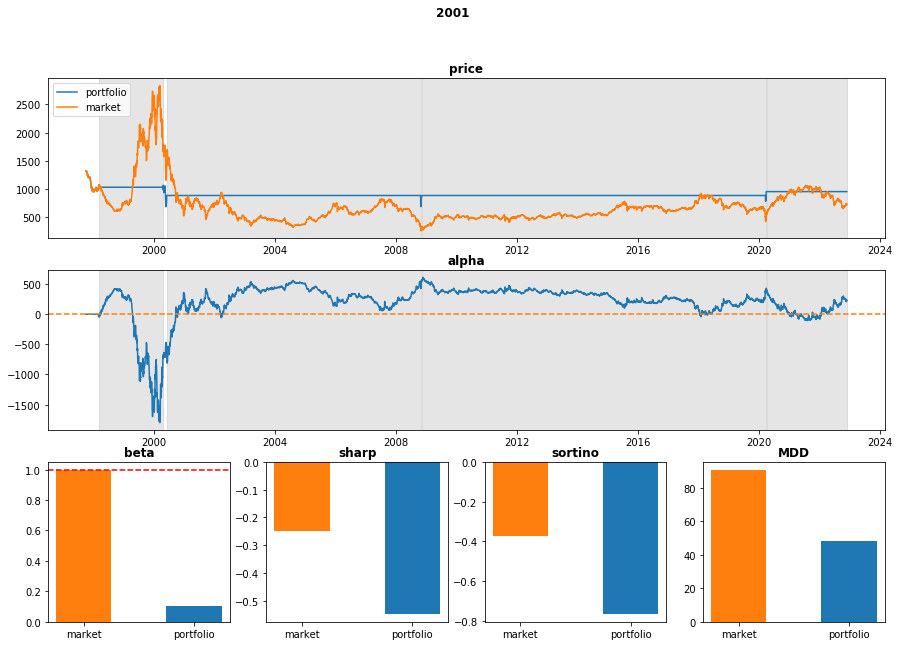

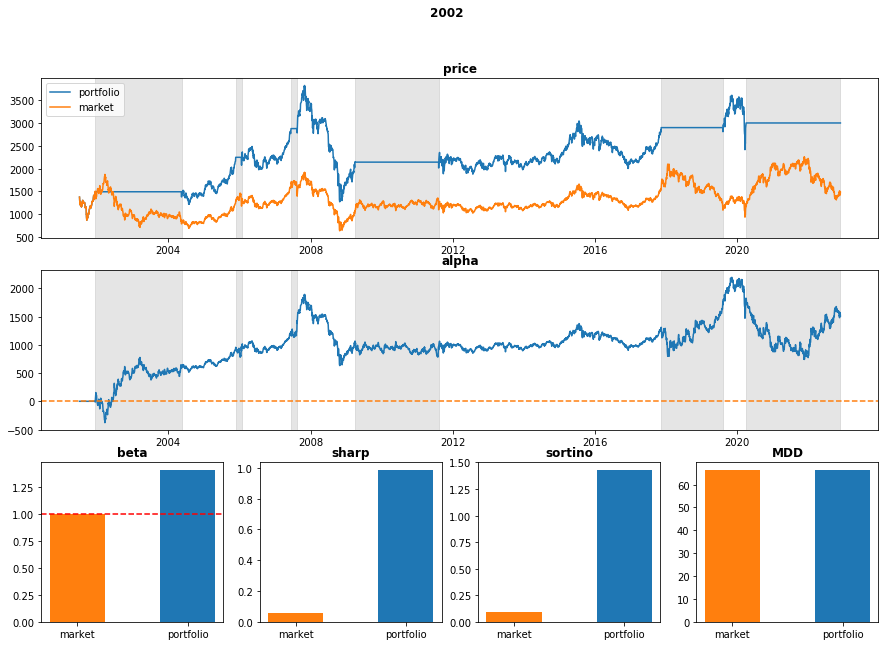

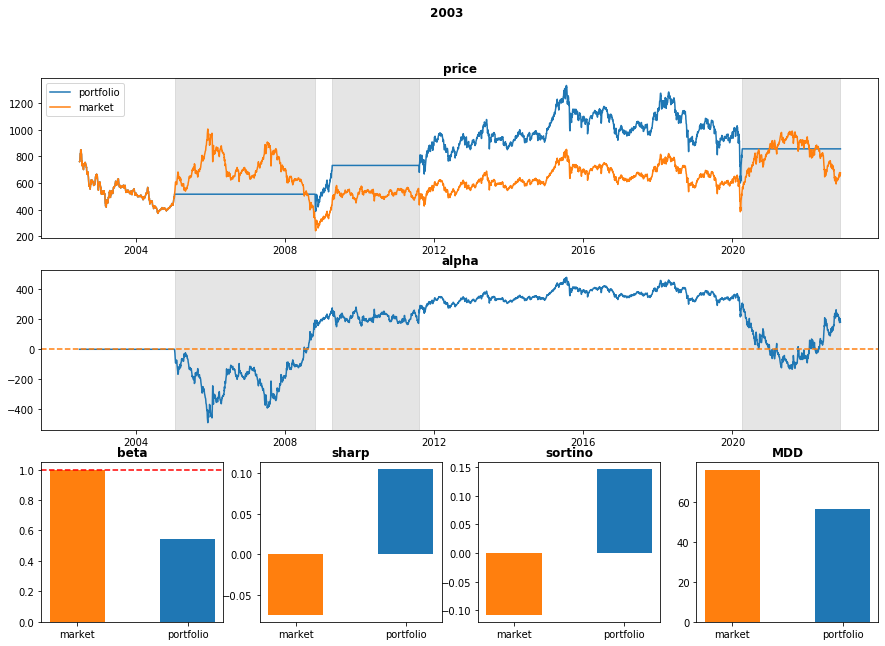

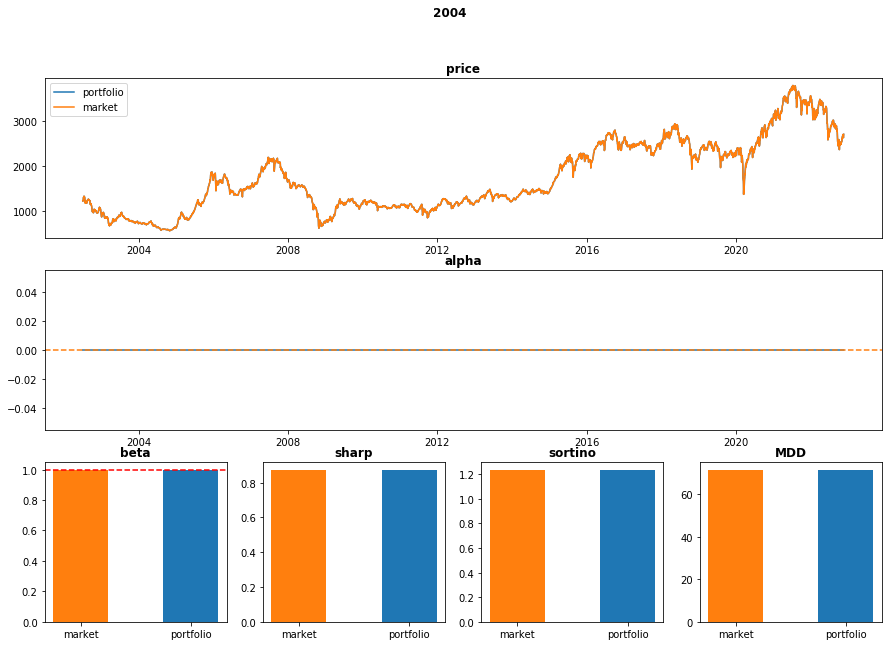

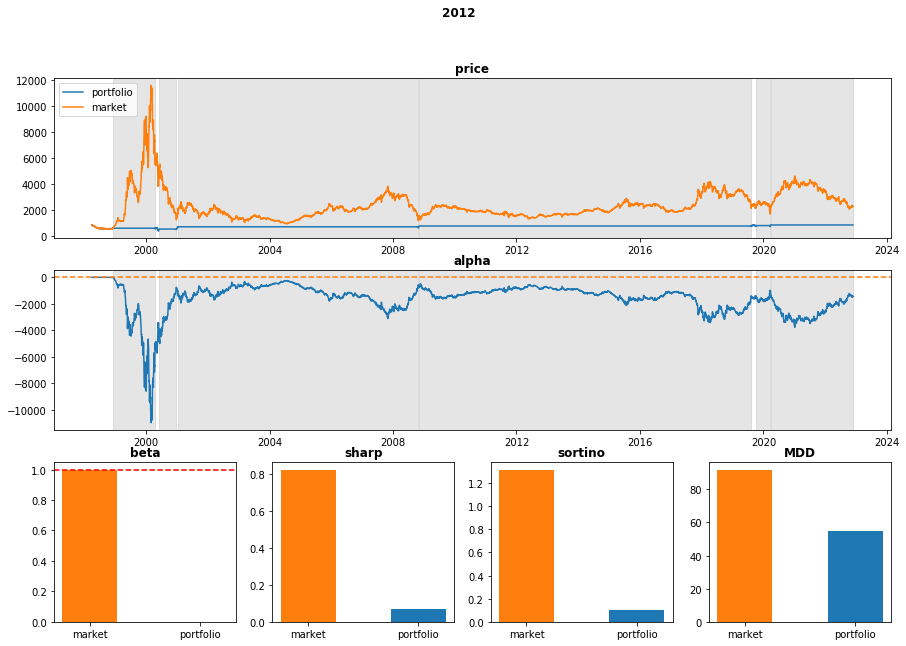

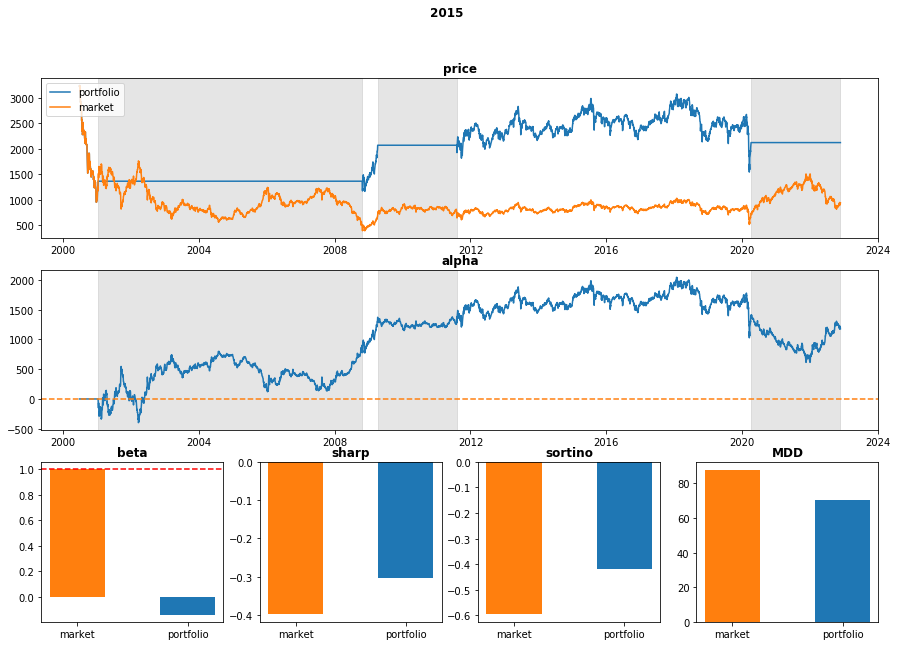

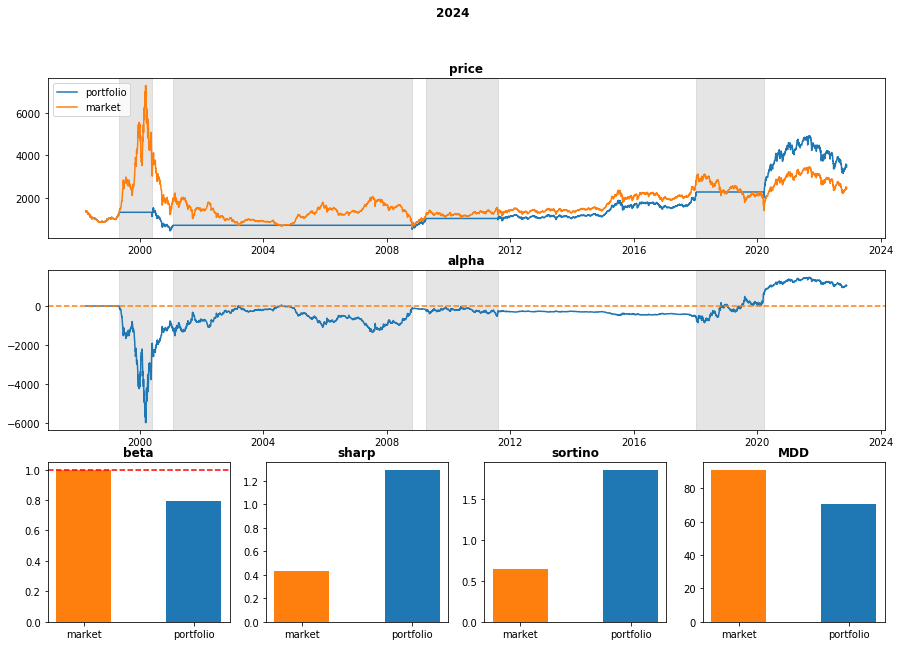

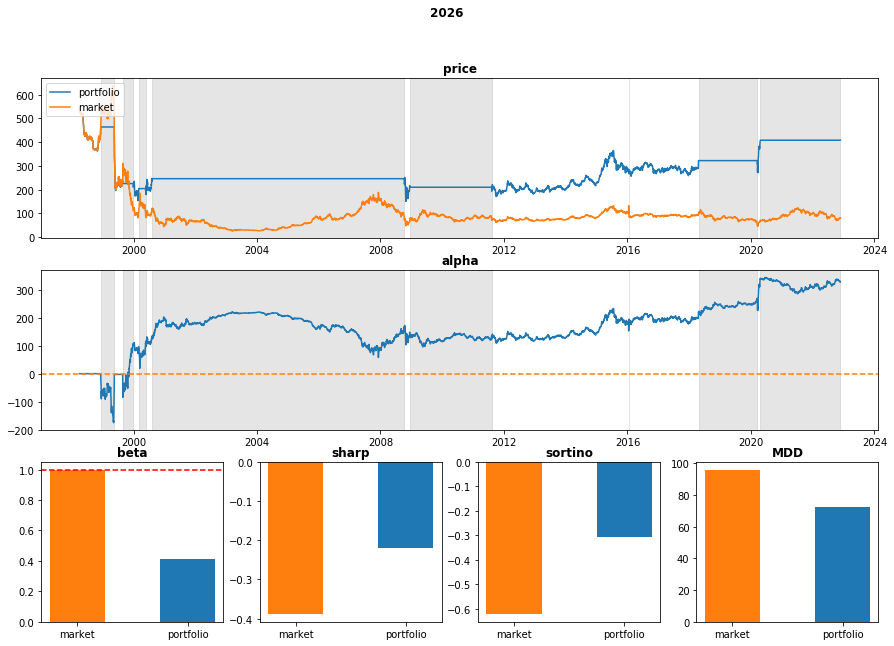

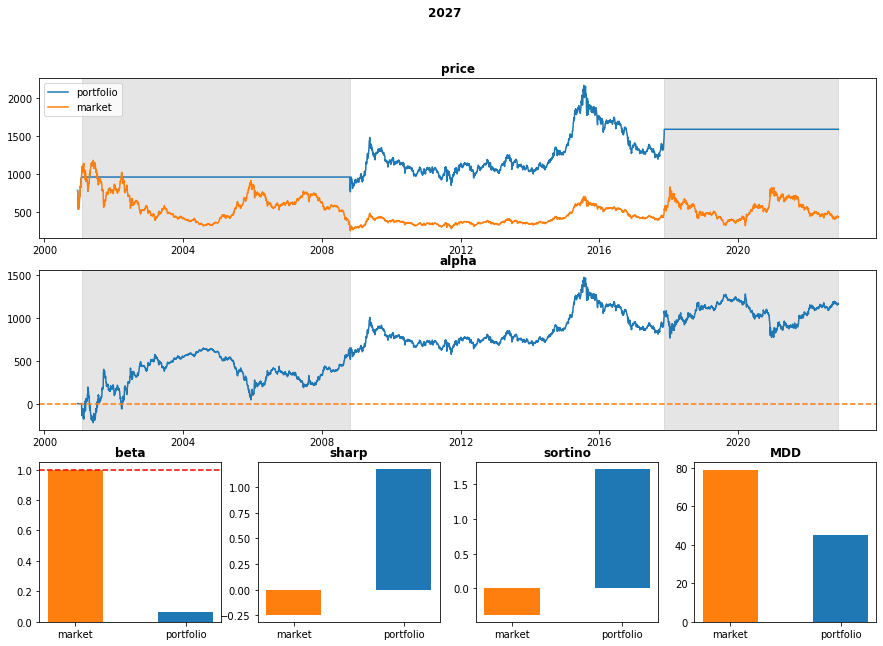

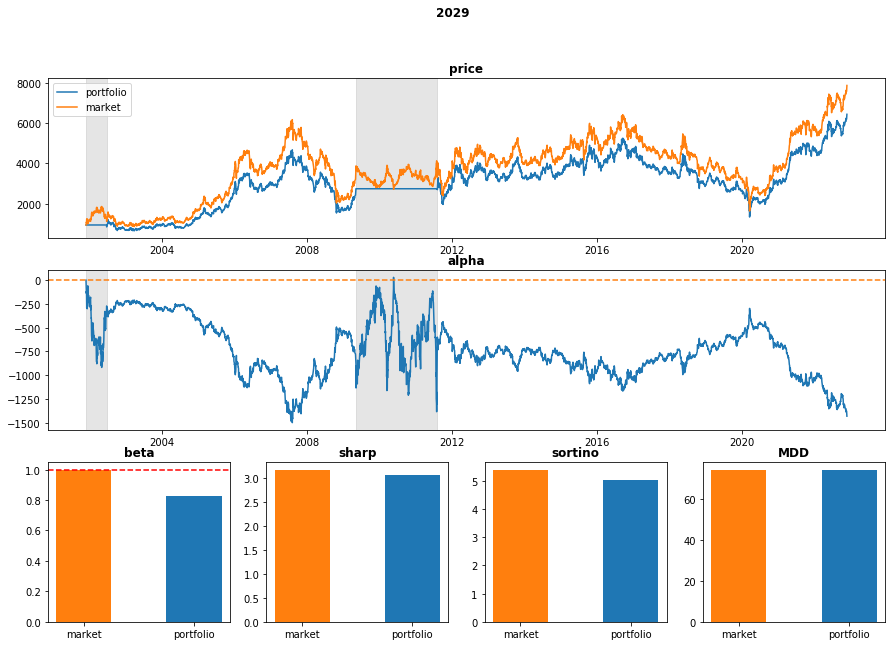

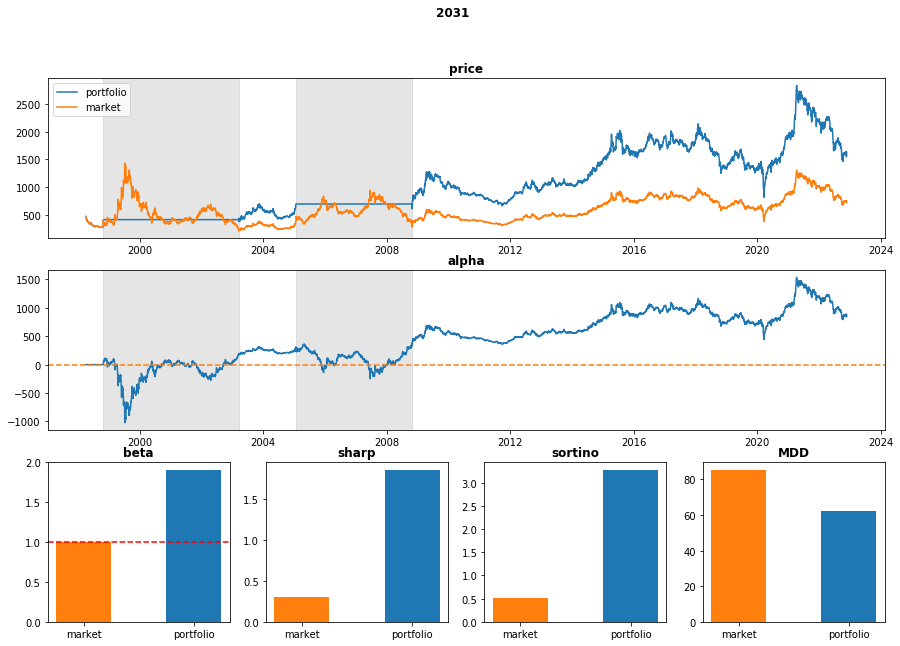

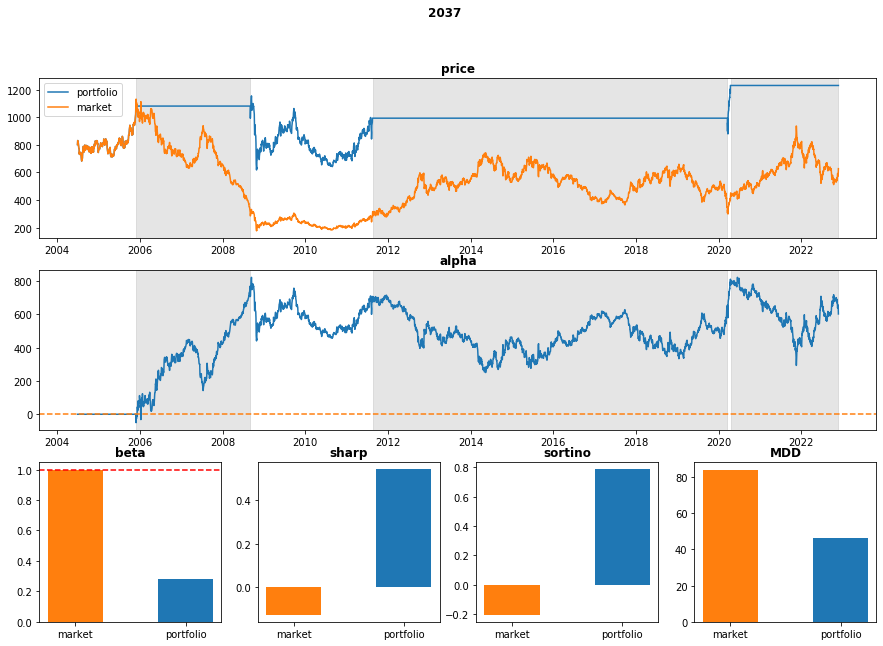

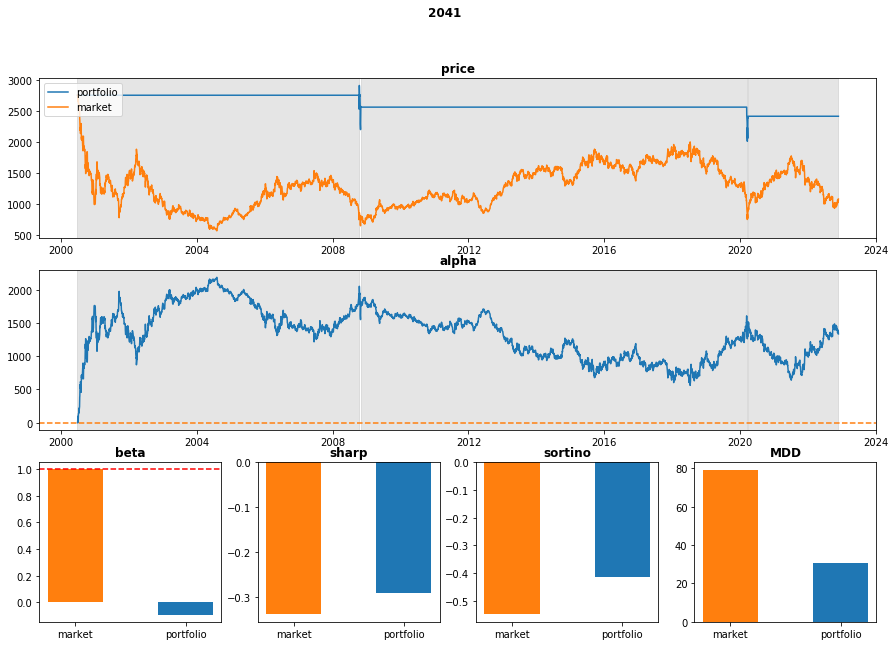

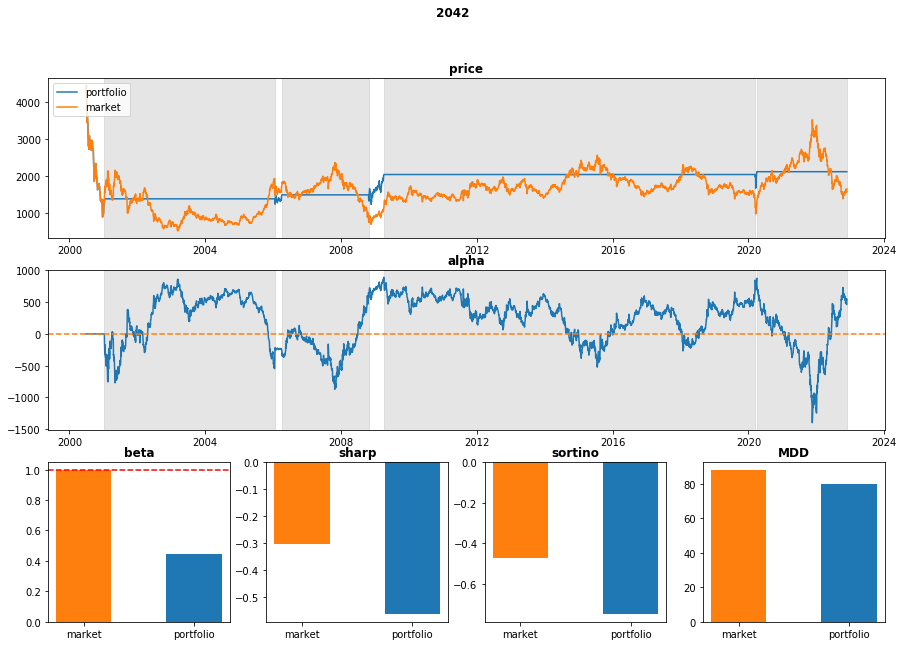

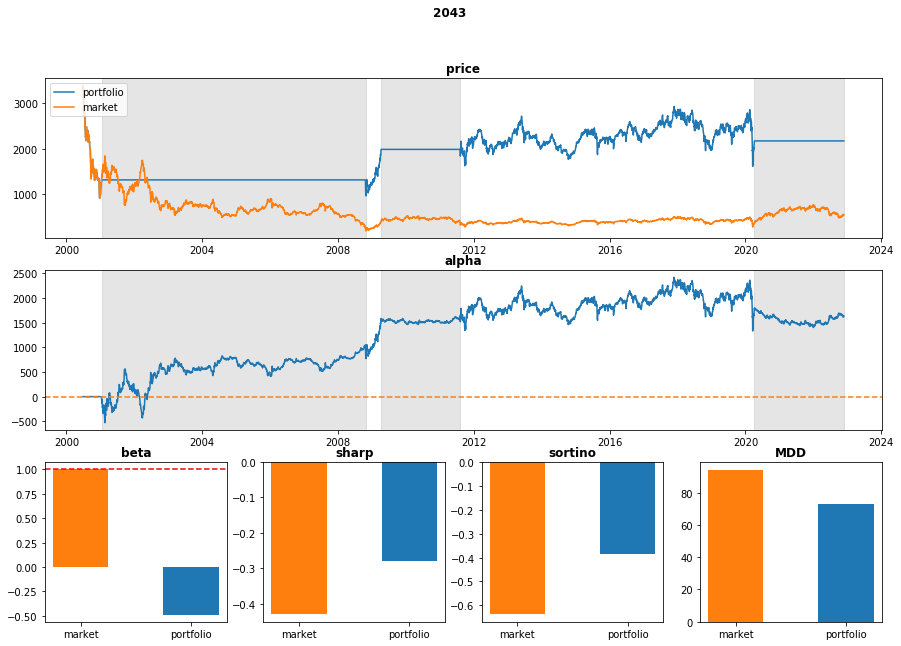

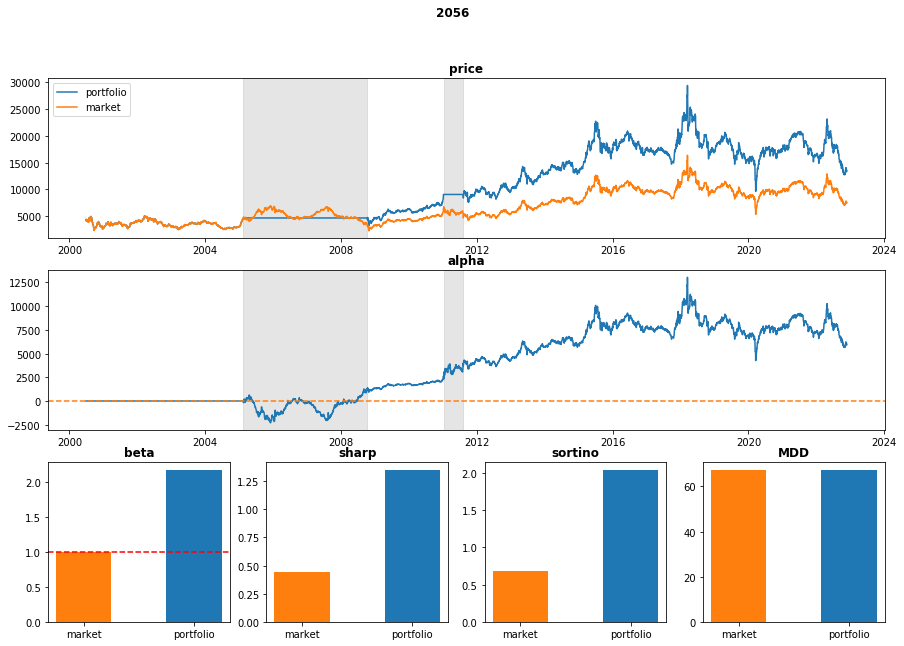

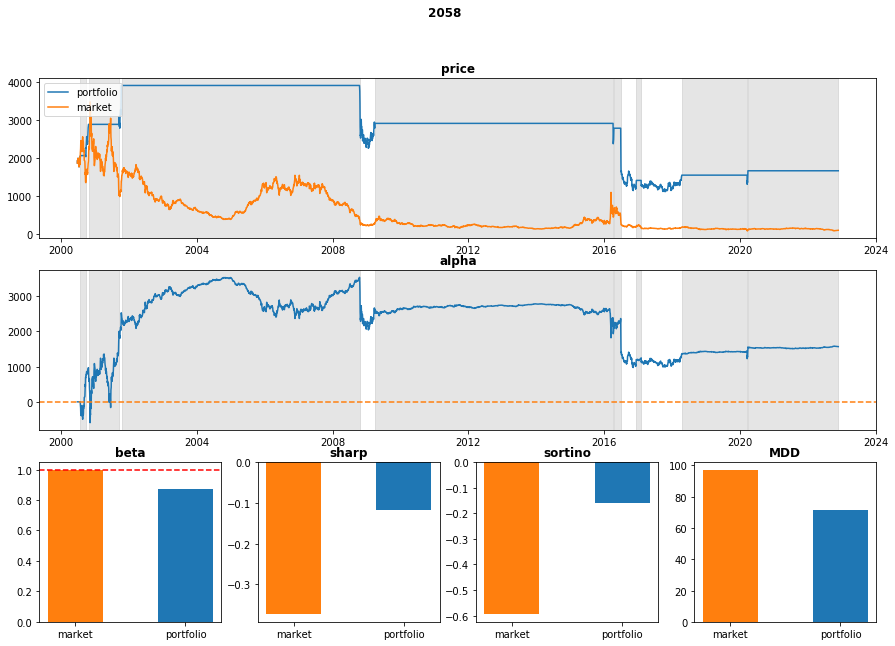

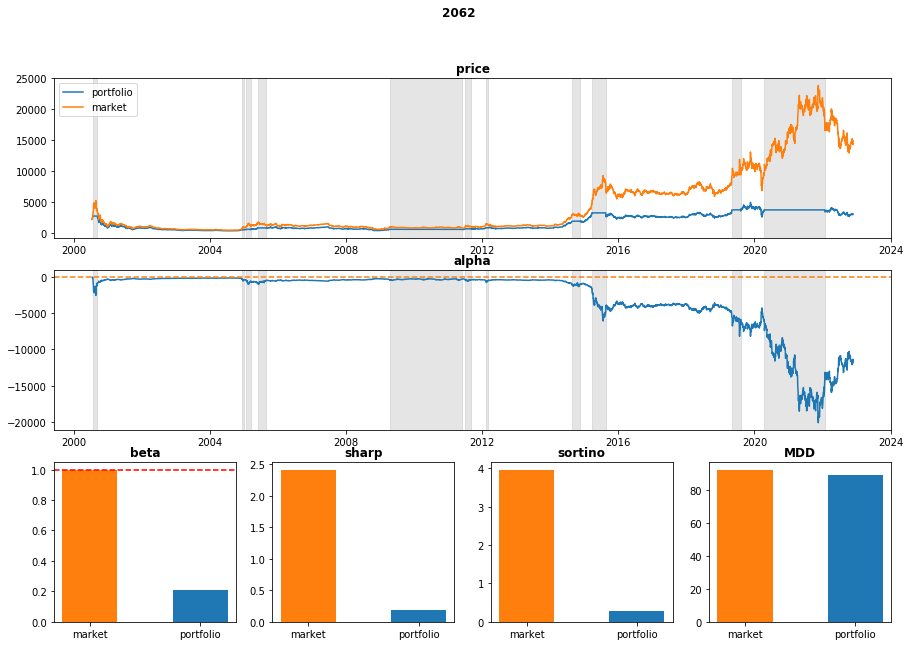

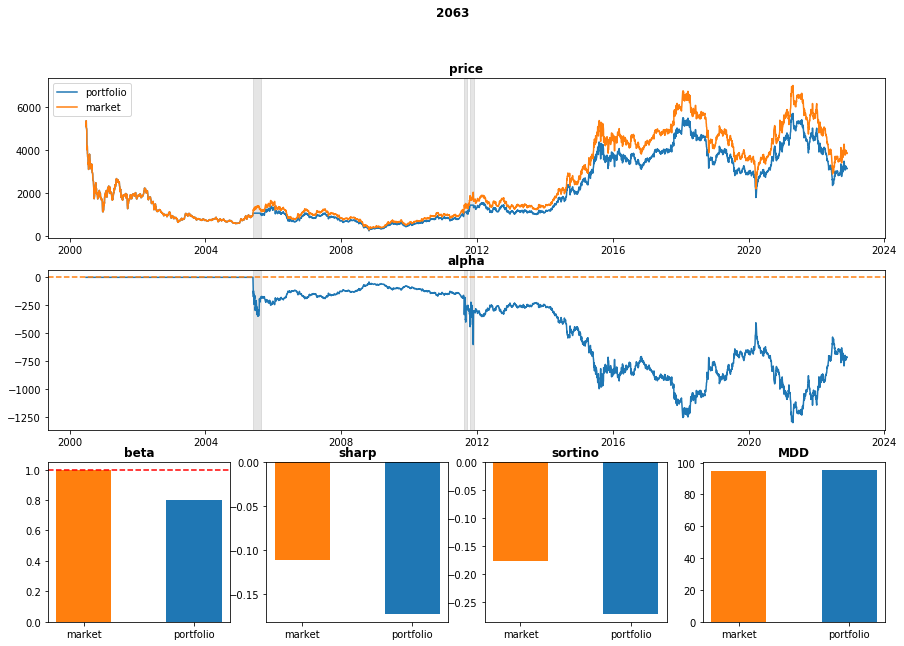

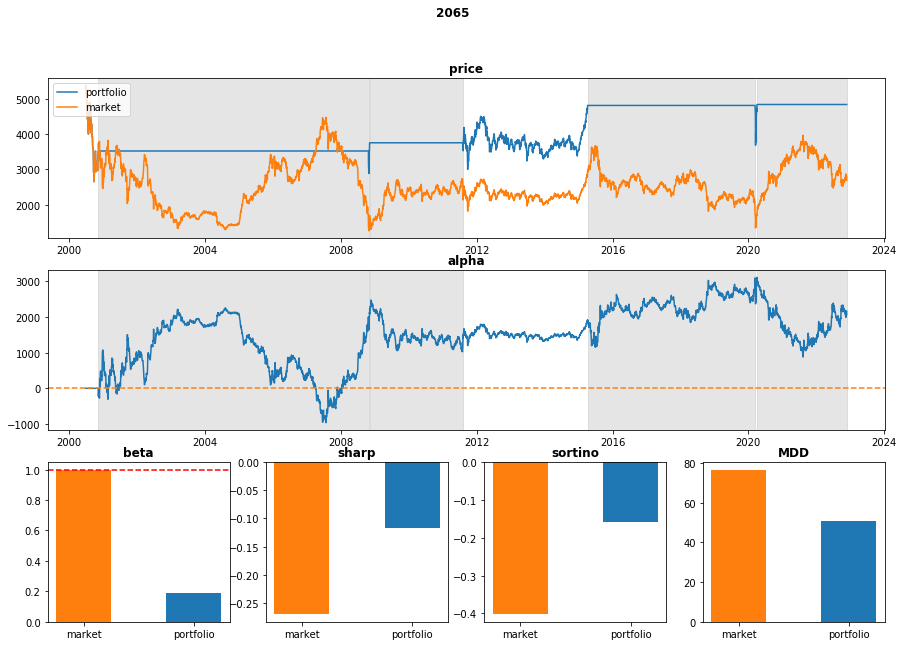

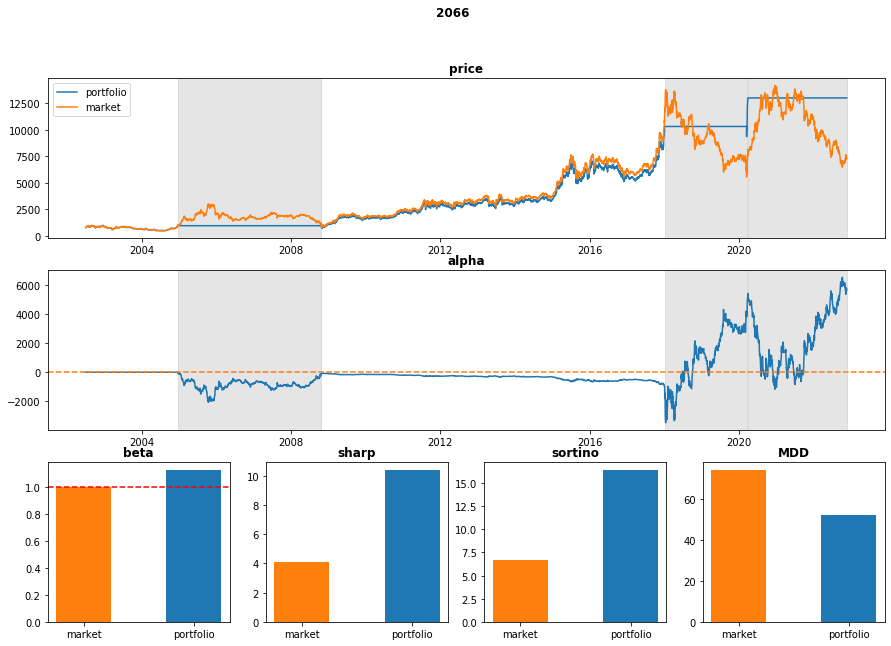

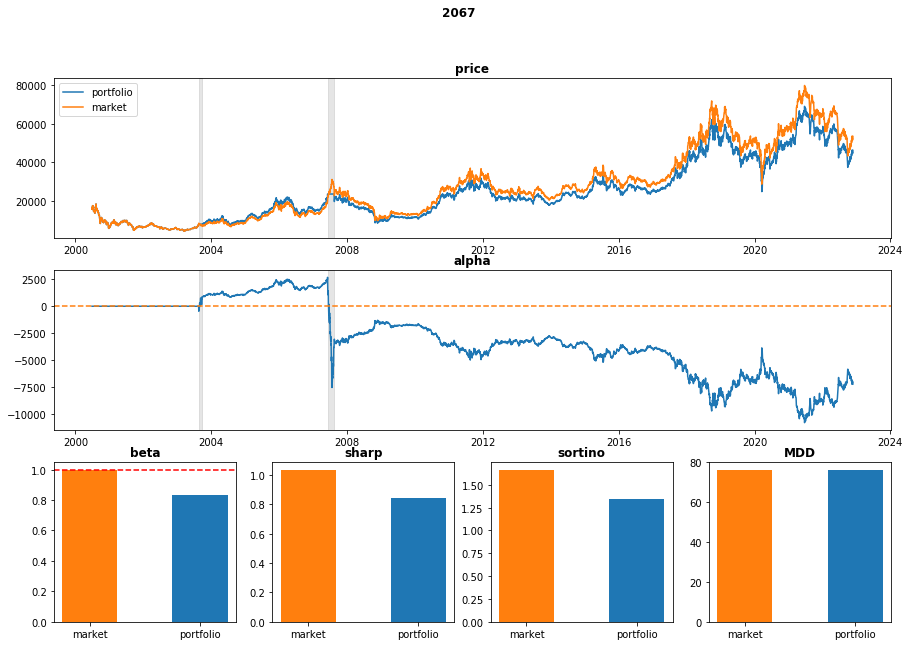

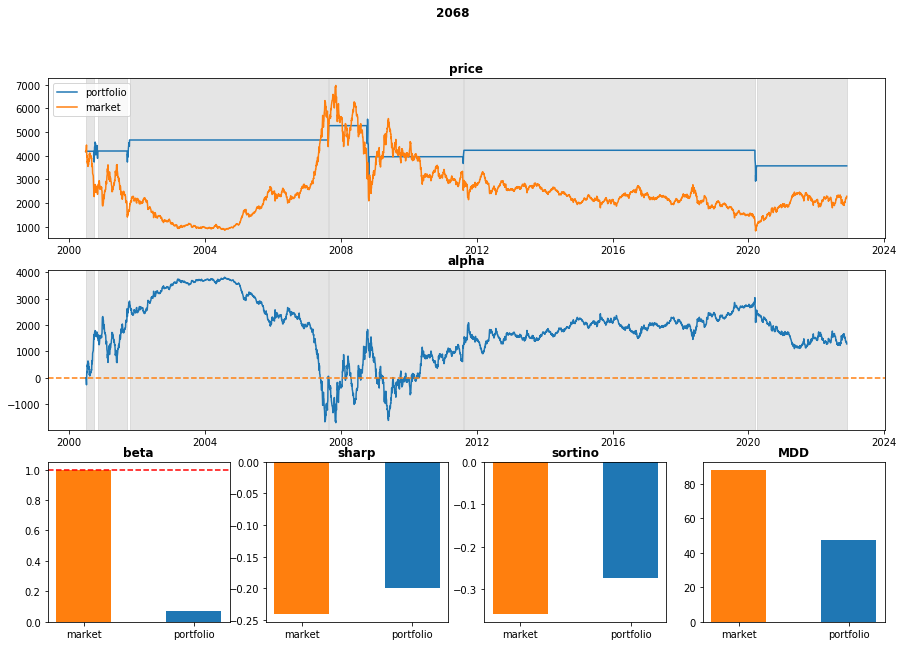

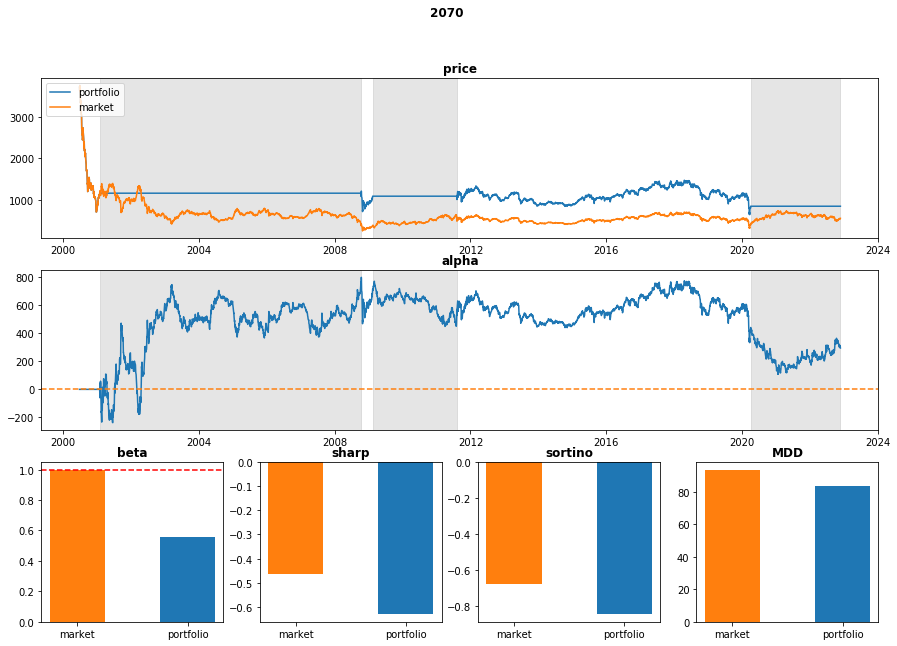

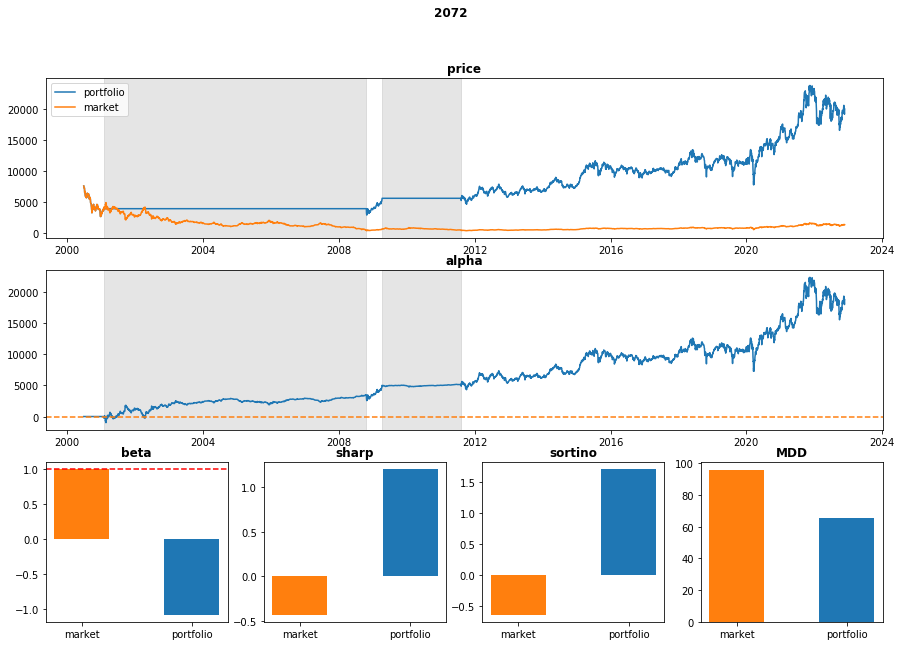

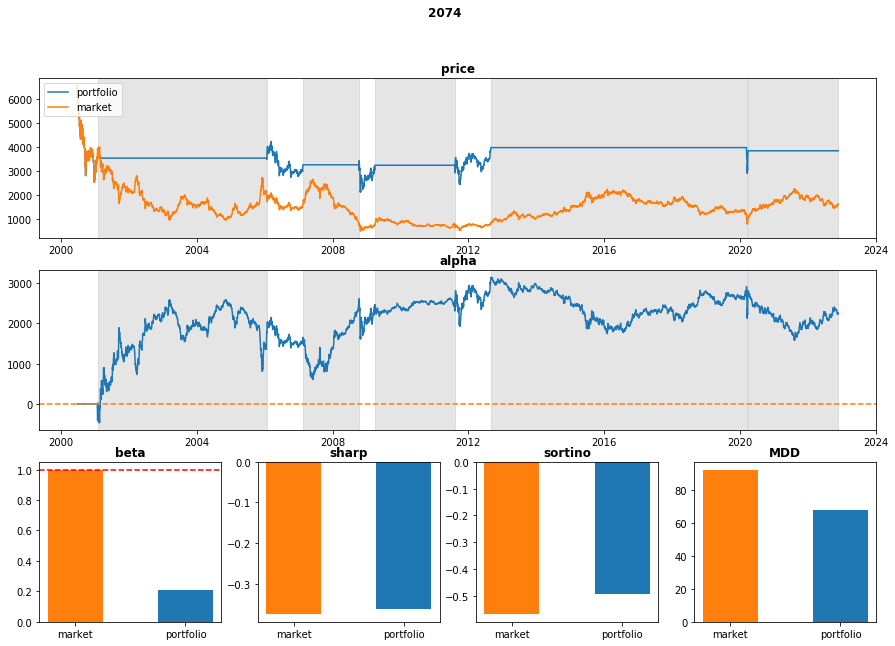

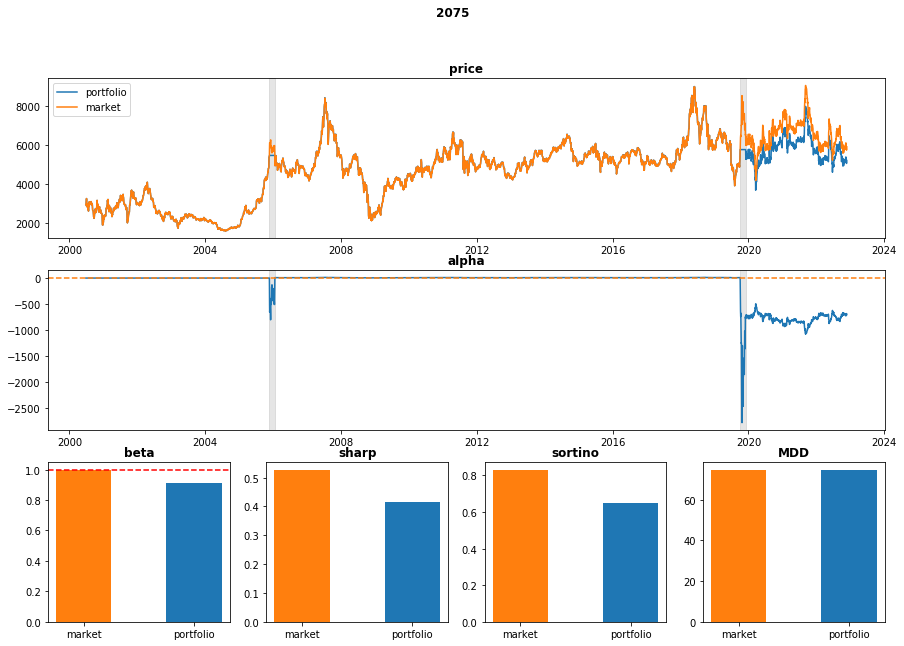

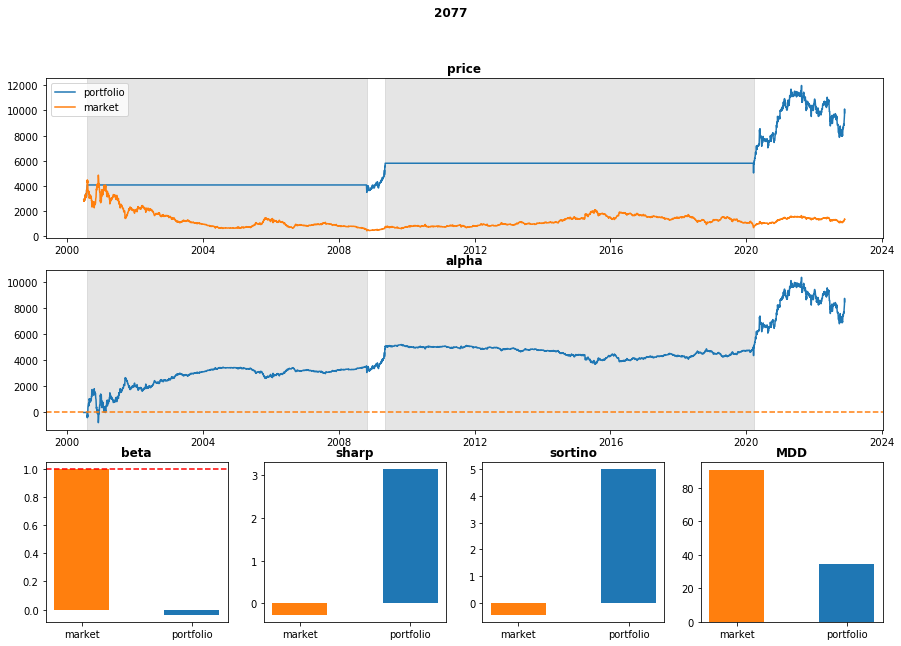

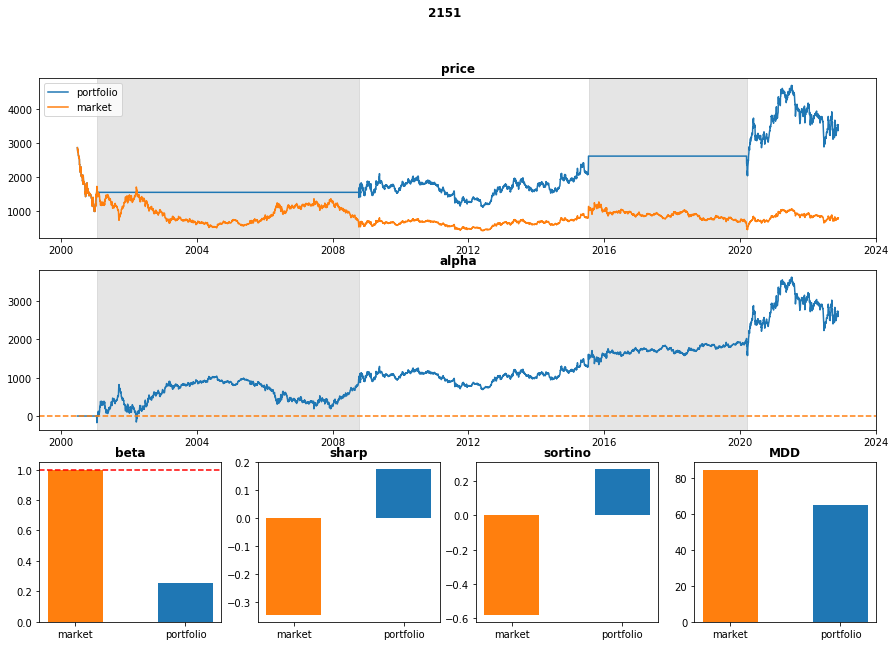

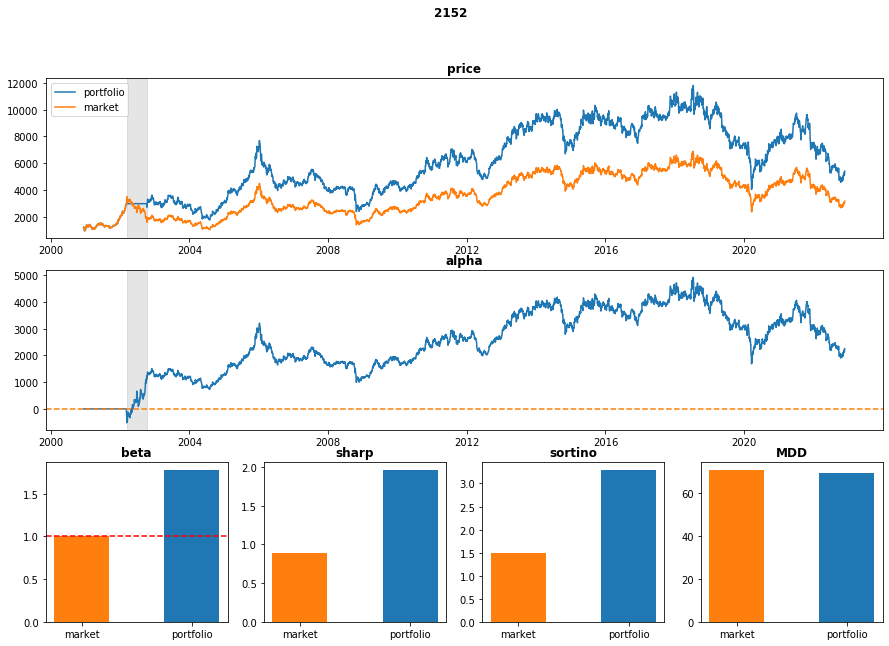

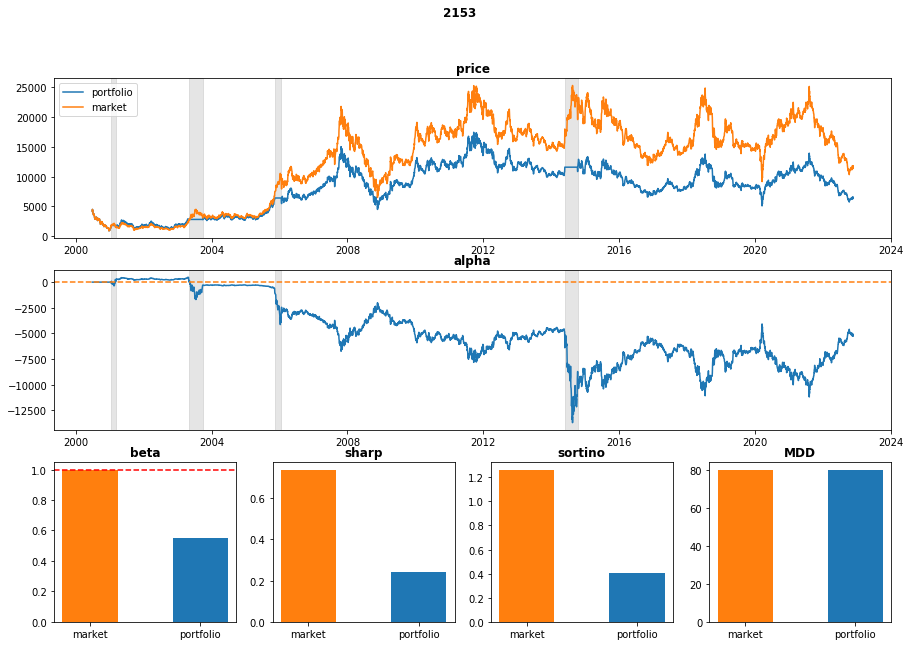

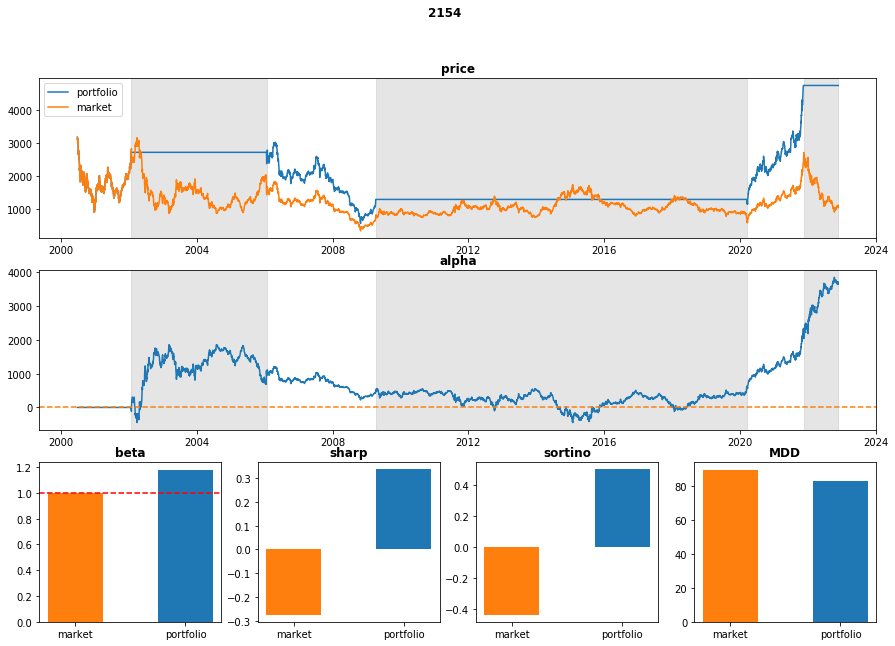

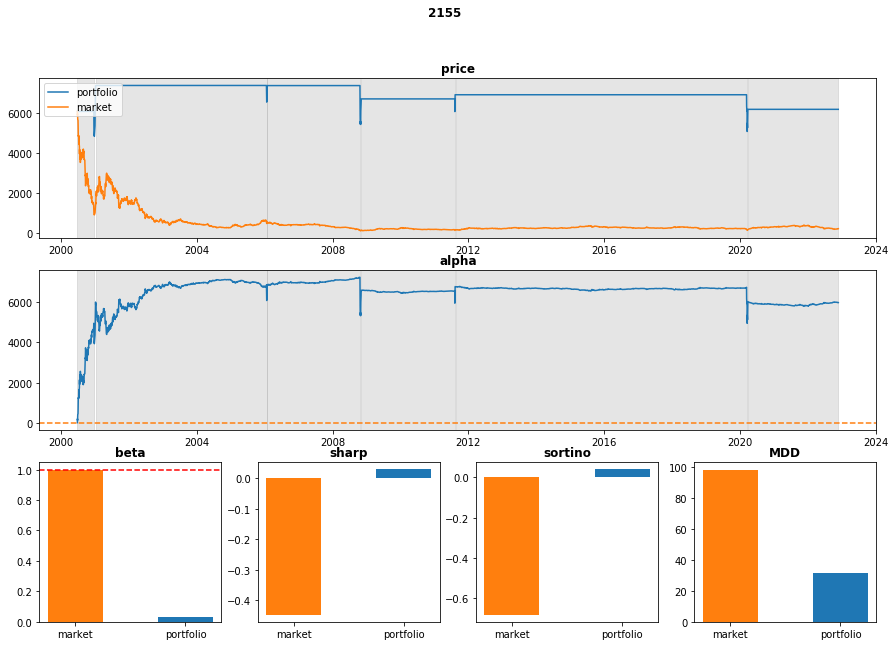

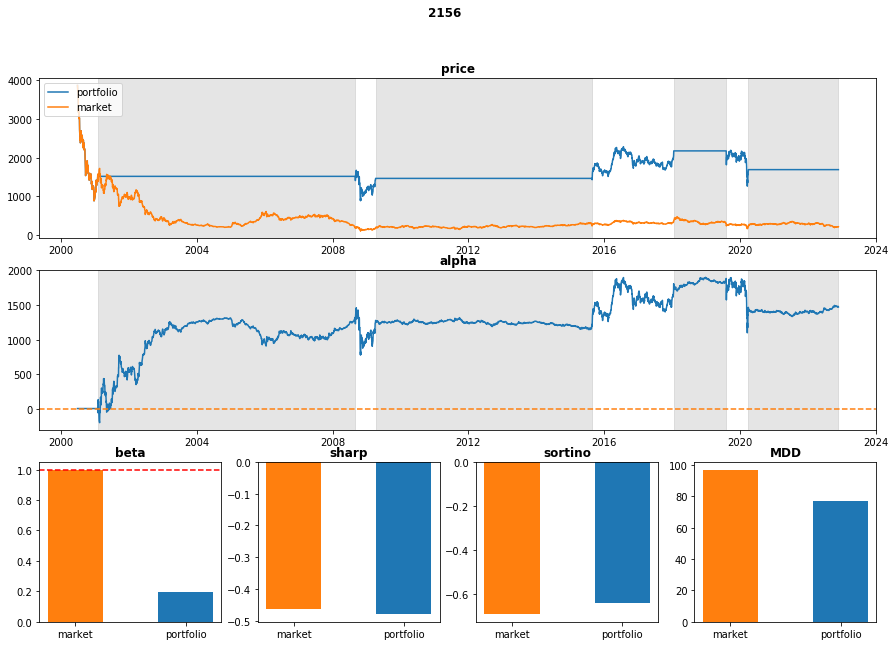

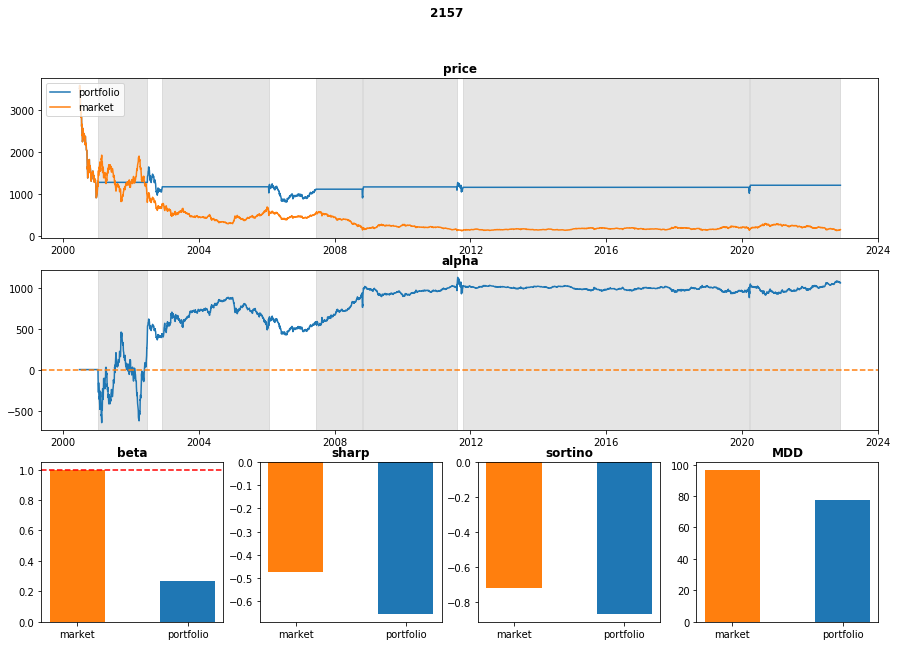

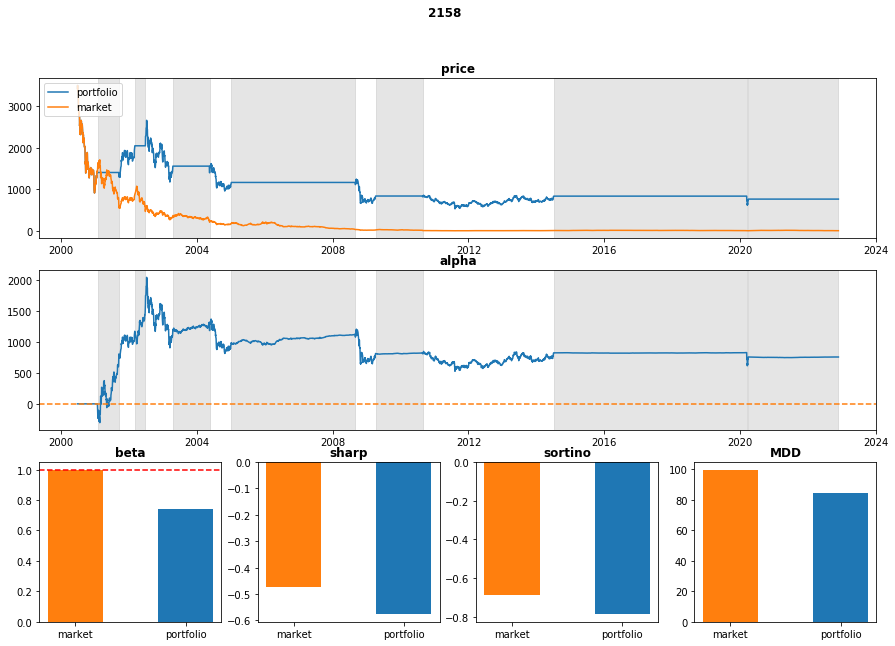

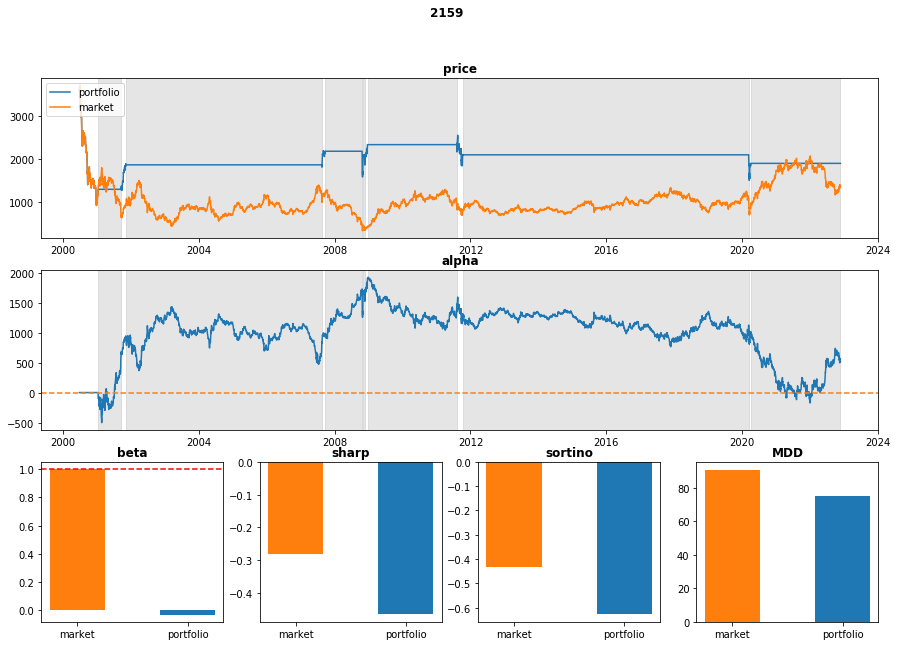

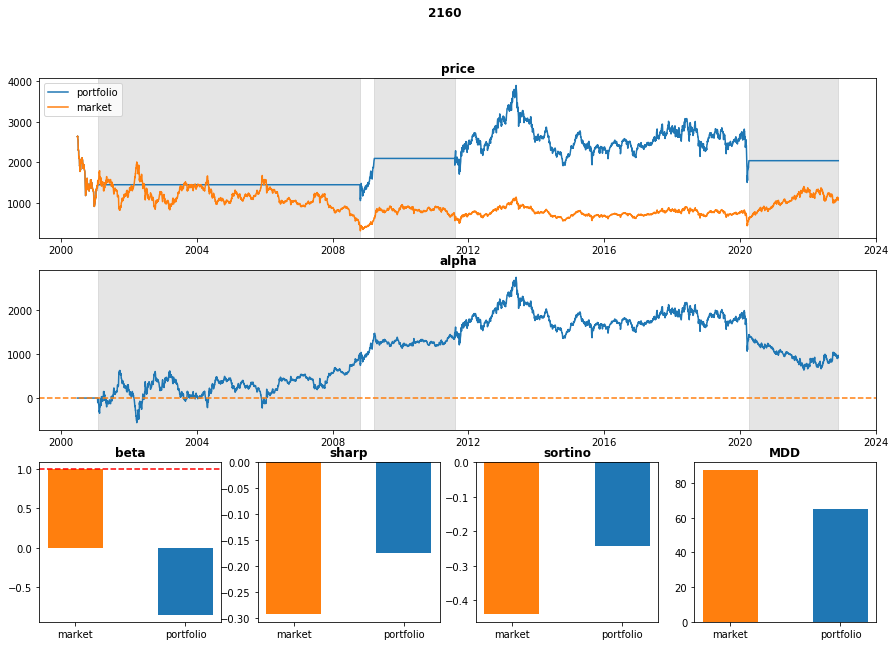

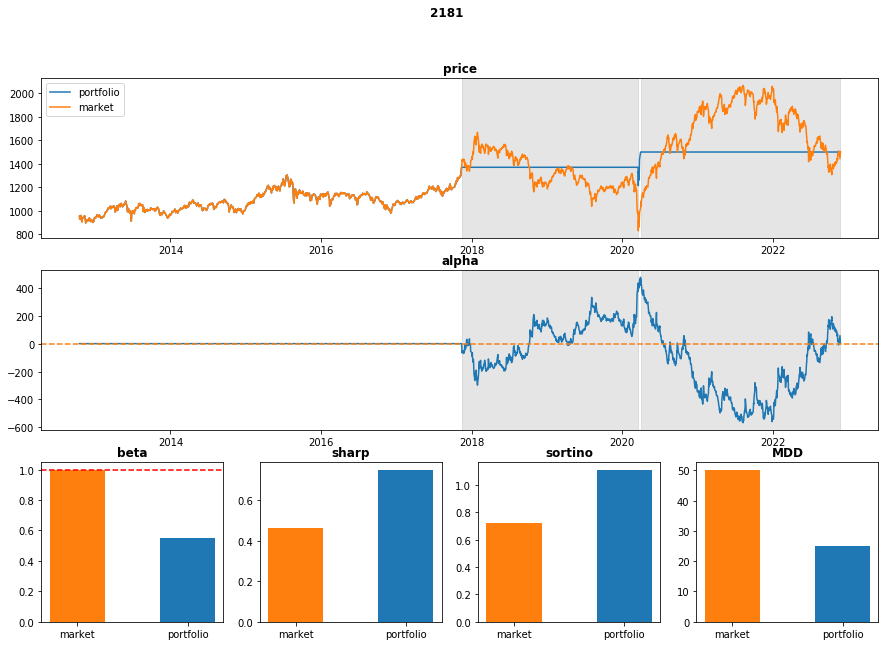

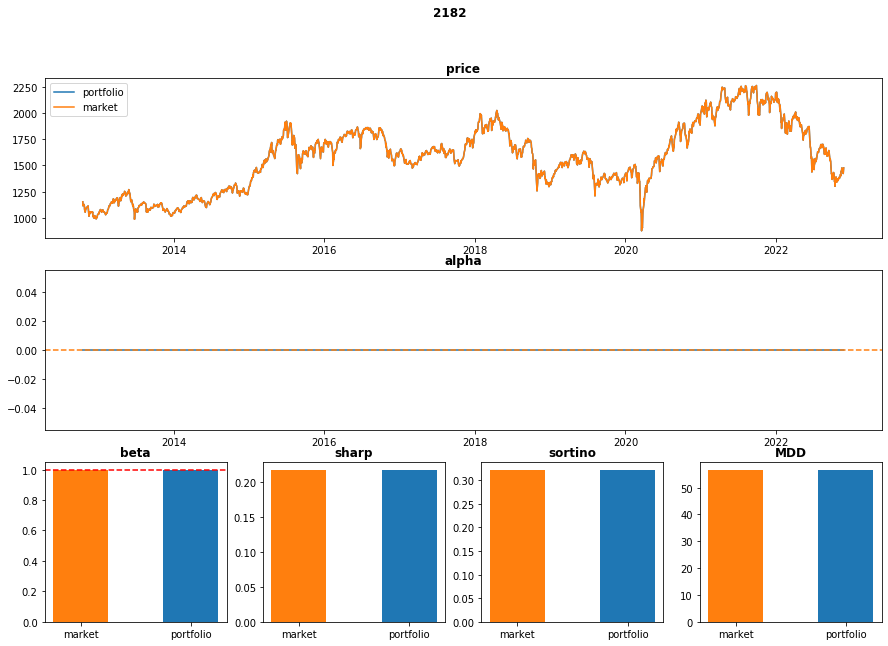

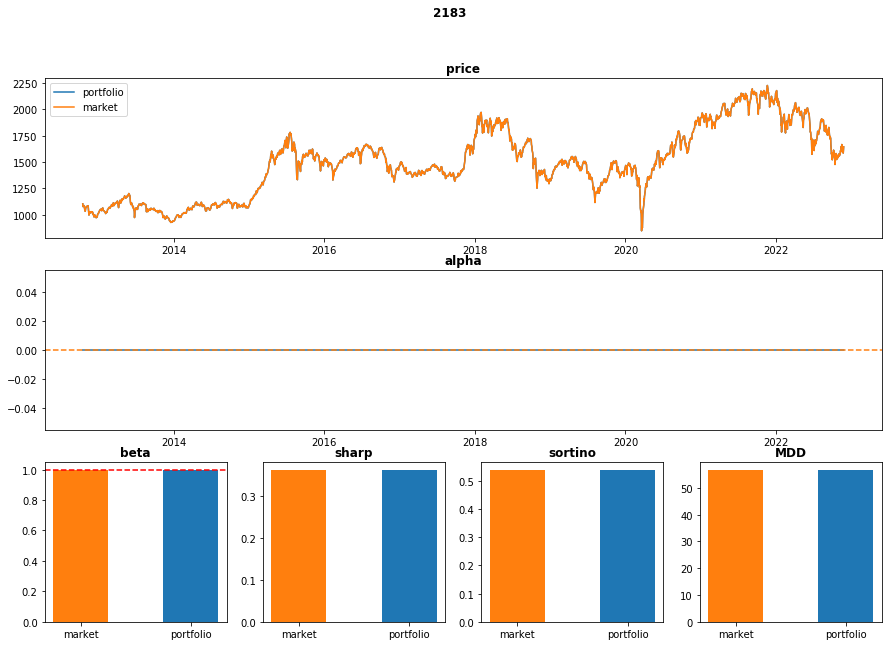

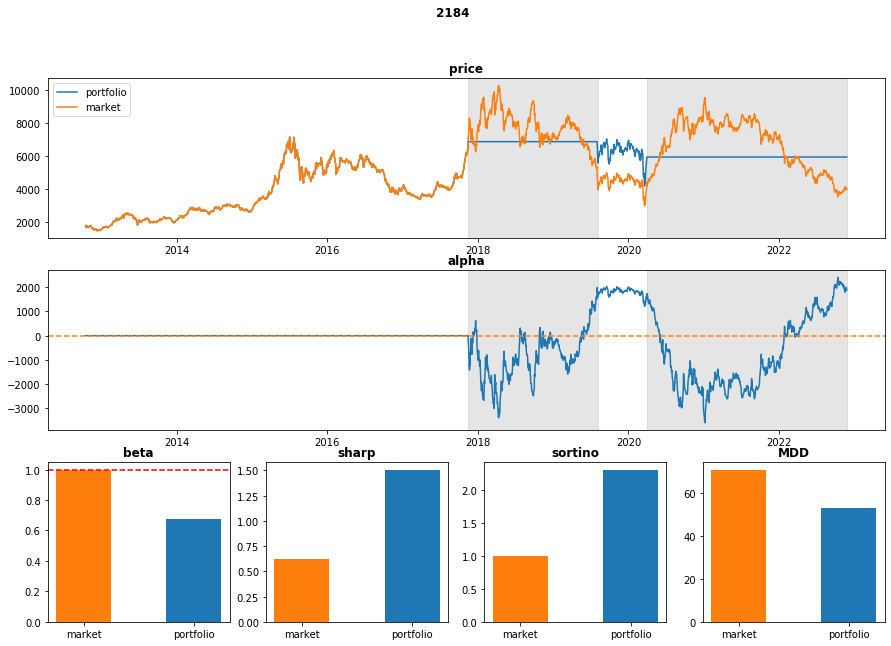

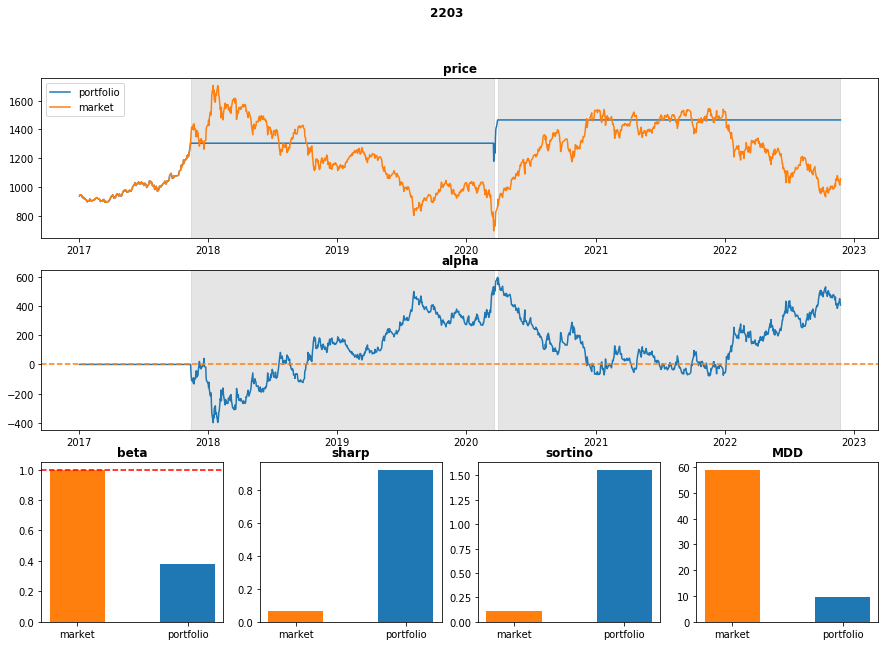

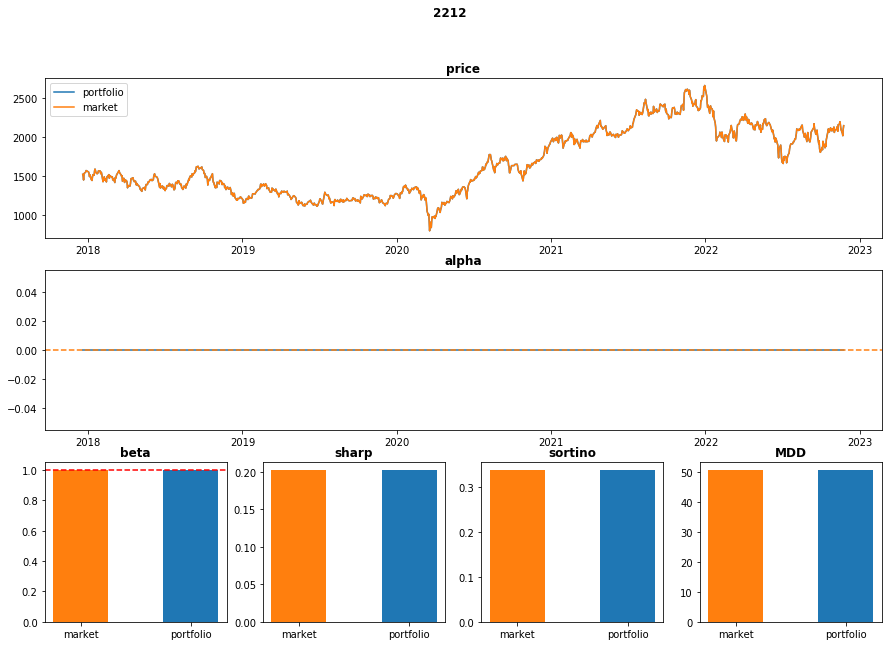

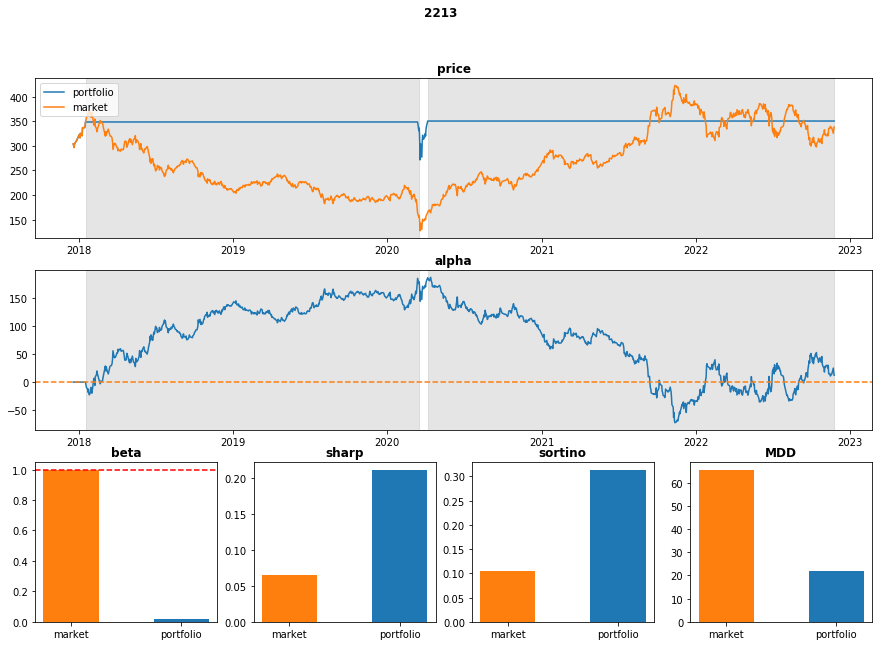

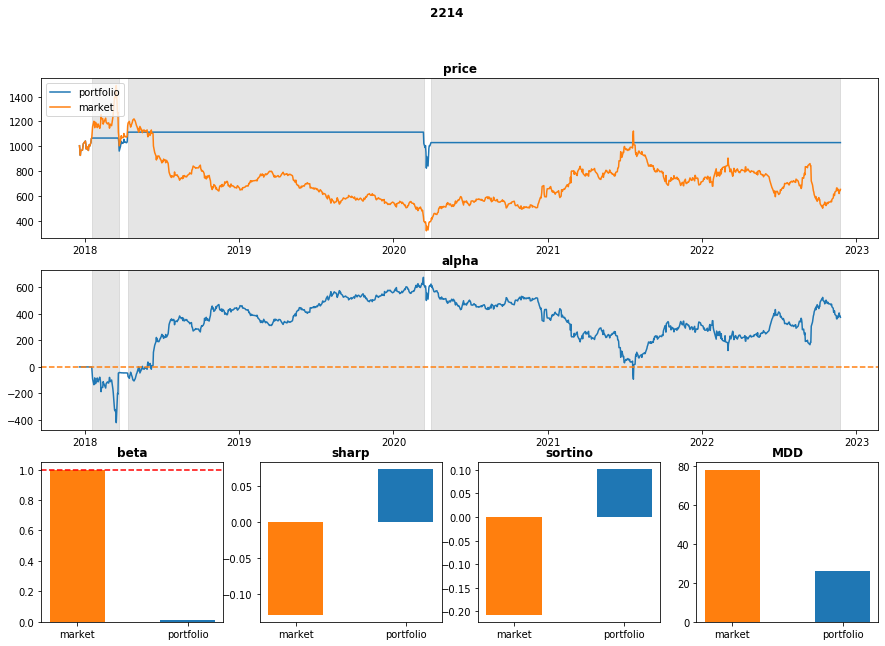

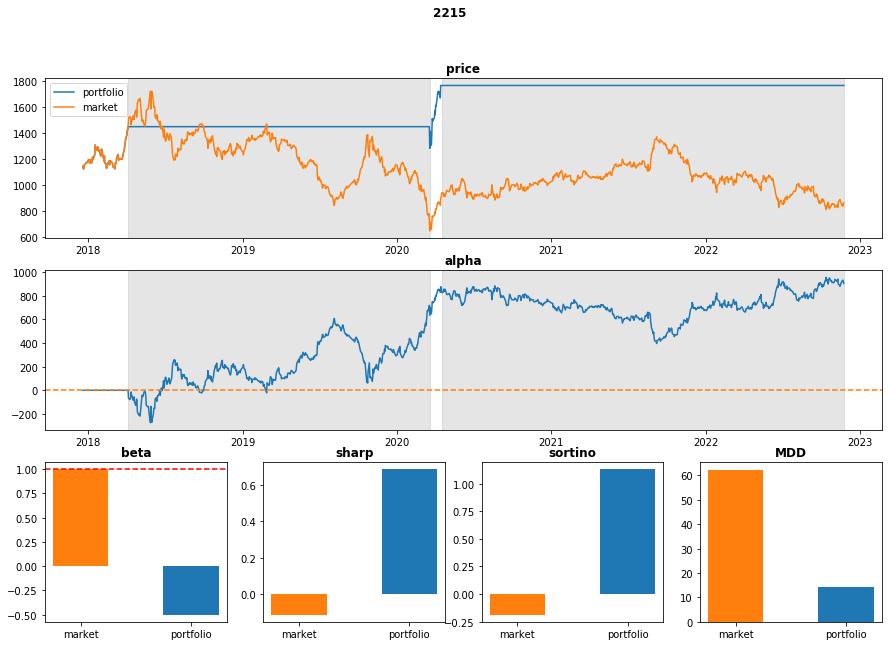

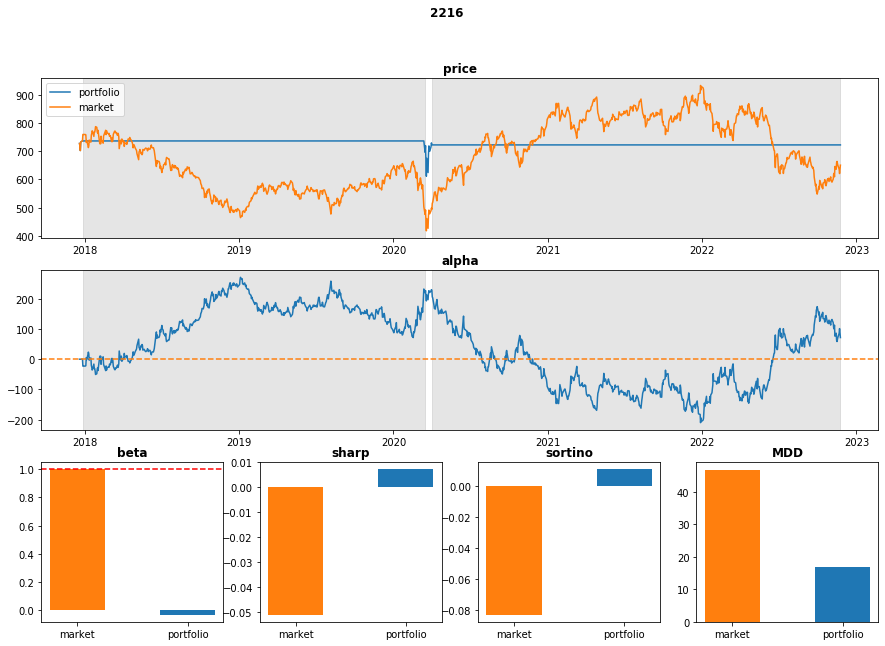

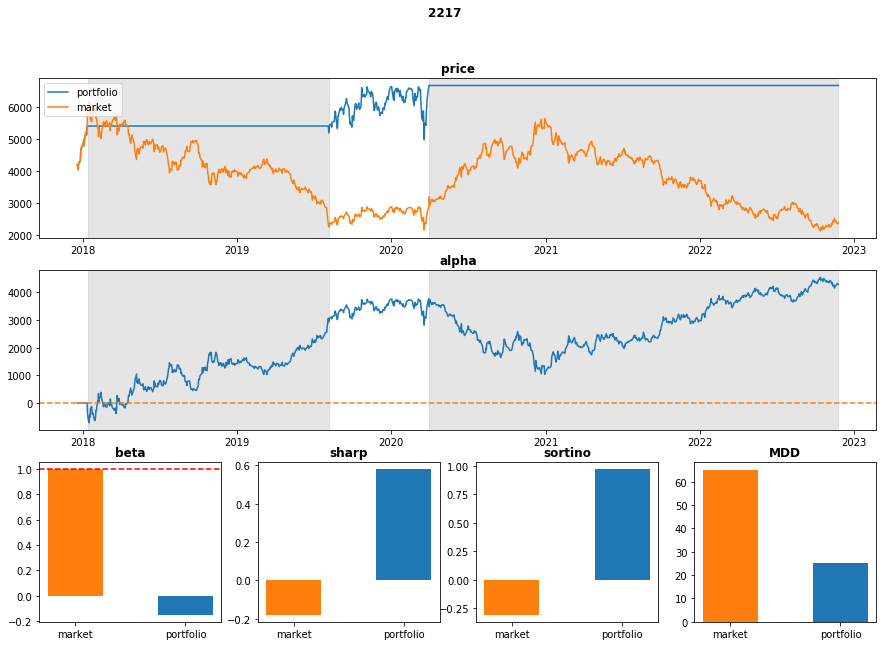

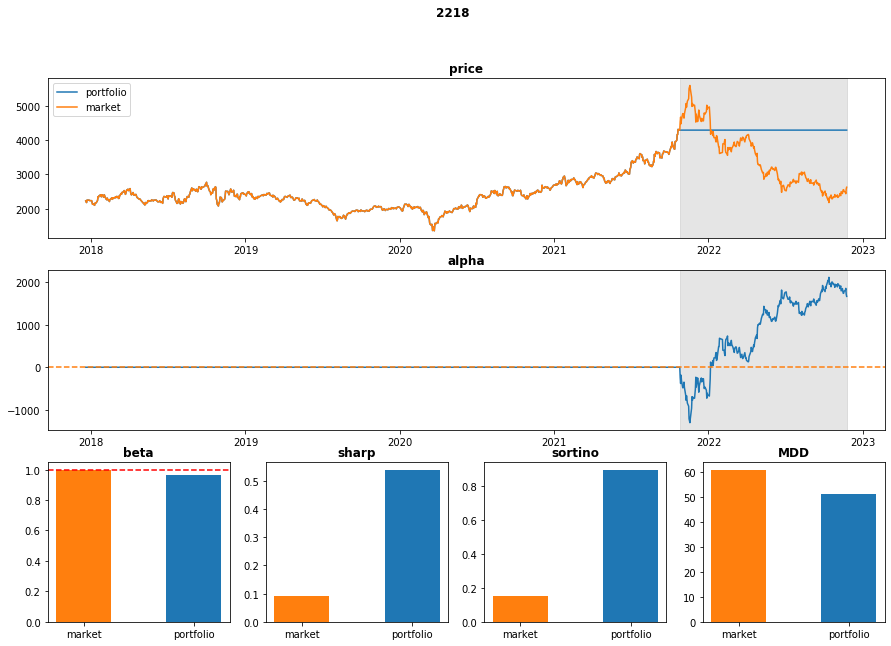

In [4]:

for i in index_final_result.index:
    
    print(index_final_result.ticker[i])
    
    # data read
    
    fname = "data_FGscore/{}.csv".format(index_final_result.ticker[i])
    url = f"{minio_uri}/{bucket_name}/{fname}"
    stock = pd.read_csv(url)
    stock.columns = ["index","datetime","close",'volume','multiple_volume','per','Volatility_list','Volume_list','S1_score','S2_score',"FG_score"]
    stock = stock.sort_values("datetime").reset_index(drop=True)
    
    # backtesting
    portfolio_result, anomaly_list = back_testing(stock,
                                                  buying_score = index_final_result.buying_point[i],
                                                  selling_score = index_final_result.selling_point[i],
                                                  print_type = False)
    
    # plot image
    stock['simul'] = portfolio_result
    datetime_list = [datetime.strptime(i,"%Y-%m-%d").date() for i in stock.datetime]
    stock["datetime"] = datetime_list

    #plot image 
    plot_all(stock, anomaly_list, index_final_result.ticker[i])

    